# Logistic Regression on Algerian Forest Fire Dataset .

![](https://i.imgur.com/Ms6XMyC.jpg)

## <font color=#00008B>What is Logistic Regresssion</font>
- Logistic Regression is applied to predict the categorical dependent variable. 
- In other words, it's used when the prediction is categorical like (yes or no), (True or False), (0 or 1)
- The predicted probability or output of logistic regression can be either one of them, and there's no middle ground

## <font color=#00008B>Advantages of Logisitic Regression</font>
- It is very simple and easy to implement.
- The output is more informative than other classification algorithms
- It expresses the relationship between independent and dependent variables
- Very effective with linearly seperable data

## <font color=#00008B>Disadvantages of Logistic Regression</font>
- Not effective with data which are not linearly seperable
- Not as powerful as other classification models
- Multiclass classifications are much easier to do with other algorithms than logisitic regression
- It can only predict categorical outcomes

## Task we have performed
- Reading the dataset
- Checking the null values
- Drop rows which have null values
- Shape of the dataset
- Datatypes and Describe
- Data Cleaning
- Statistical Analysis
- Regression plot
- Handling the outiers
- Logistic Regression Model Training
- Standardizing or Feature Selection
- Accuracy, Precision, Recall, F1-score, Area under Curve, Roc

- Create inbalance dataset from original balanced data
- logistic regression on inbalance data
- Conclusion

### <font color=green>Importing Required Libraries</font>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

### <font color=green>Reading the dataset</font>

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/tanay0nSpark/Machine-Learning/main/Linear%20Regression%20Algerian%20forest/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

### <font color=#00008B>Info about dataset and its attributess</font>

1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### <font color=green>Checking the null value</font>

In [3]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### <font color=green>Drop rows which have null values</font>

In [4]:
df.drop([122,123,167],axis = 0,inplace = True)

### <font color=green>Shape of the dataset</font>

In [5]:
df.shape

(243, 14)

### Data Cleaning

### <font color=green>Columns name having extra spaces</font>

In [6]:
columns_with_spaces = [fea for fea in df.columns if " " in fea]
columns_with_spaces

[' RH', ' Ws', 'Rain ', 'Classes  ']

### <font color=green>Removing the space in feature title</font>

In [7]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### <font color=green>Function to remove extra space in data</font>

In [8]:
def remove_space(x):
    return x.replace(" ","")

In [9]:
df['Classes'] = df['Classes'].apply(remove_space)

In [10]:
df.head(2)

day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18    0  65.7  3.4  7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13  1.3  64.4  4.1  7.6    1  3.9  0.4   

   Classes  
0  notfire  
1  notfire

### <font color=green>Creating Region feature</font>

In [11]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

df.iloc[120:125]

day month  year Temperature  RH  Ws Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
120  29    09  2012          26  80  16  1.8  47.4  2.9  7.7  0.3    3  0.1   
121  30    09  2012          25  78  14  1.4    45  1.9  7.5  0.2  2.4  0.1   
124  01    06  2012          32  71  12  0.7  57.1  2.5  8.2  0.6  2.8  0.2   
125  02    06  2012          30  73  13    4  55.7  2.7  7.8  0.6  2.9  0.2   
126  03    06  2012          29  80  14    2  48.7  2.2  7.6  0.3  2.6  0.1   

     Classes  Region  
120  notfire     0.0  
121  notfire     0.0  
124  notfire     1.0  
125  notfire     1.0  
126  notfire     1.0

### <font color=green>Datatypes and Describe</font>

In [12]:
# here it is visible that all datatypes are in object 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.5+ KB


In [13]:
df.describe(include = 'all').T

count unique   top freq      mean       std  min  25%  50%  75%  \
day            243     31    01    8       NaN       NaN  NaN  NaN  NaN  NaN   
month          243      4    08   62       NaN       NaN  NaN  NaN  NaN  NaN   
year           243      1  2012  243       NaN       NaN  NaN  NaN  NaN  NaN   
Temperature    243     19    35   29       NaN       NaN  NaN  NaN  NaN  NaN   
RH             243     62    64   10       NaN       NaN  NaN  NaN  NaN  NaN   
Ws             243     18    14   43       NaN       NaN  NaN  NaN  NaN  NaN   
Rain           243     39     0  133       NaN       NaN  NaN  NaN  NaN  NaN   
FFMC           243    173  88.9    7       NaN       NaN  NaN  NaN  NaN  NaN   
DMC            243    165   7.9    5       NaN       NaN  NaN  NaN  NaN  NaN   
DC             243    197     8    5       NaN       NaN  NaN  NaN  NaN  NaN   
ISI            243    106   1.1    8       NaN       NaN  NaN  NaN  NaN  NaN   
BUI            243    173     3    5       NaN       NaN  NaN  NaN  NaN  NaN   
FWI            243    126   0.4   12       NaN       NaN  NaN  NaN  NaN  NaN   
Classes        243      2  fire  137       NaN       NaN  NaN  NaN  NaN  NaN   
Region       243.0    NaN   NaN  NaN  0.497942  0.501028  0.0  0.0  0.0  1.0   

             max  
day          NaN  
month        NaN  
year         NaN  
Temperature  NaN  
RH           NaN  
Ws           NaN  
Rain         NaN  
FFMC         NaN  
DMC          NaN  
DC           NaN  
ISI          NaN  
BUI          NaN  
FWI          NaN  
Classes      NaN  
Region       1.0

### <font color=green>Convert notfire and fire to 0 and 1 respectively for Classes feature</font>

In [14]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [15]:
df['Classes'] = df['Classes'].replace({"notfire":0,'fire':1})
df['Classes'].unique()

array([0, 1])

### <font color=green>Changing datatype to Numerical from object</font>

In [16]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
Region         float64
dtype: object

In [17]:
###### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert = {
    'day':'int64', 'month':'int64', 'year':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64', 
    'Rain':'float64', 'FFMC':'float64','DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
    'FWI':'float64', 'Classes':'int64', 'Region':'float64'
}

df = df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

#### Observations
- So, all the features are converted from categorical to numerical datatypes

### <font color=green>Now again check the null value and duplicates</font>

In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df.duplicated().value_counts()

False    243
dtype: int64

In [20]:
df.shape

(243, 15)

#### Observations
- After data cleaning there are 243 rows and 15 columns.
- There is no null value in dataset.
- There is no duplicate observation in dataset

### <font color=green>Creating a copy of dataframe from original Dataframe</font>

In [21]:
data = df.copy()
data.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

### <font color=green>Statistical Analysis</font>

In [22]:
data.cov()

day     month  year  Temperature          RH         Ws  \
day           78.190729 -0.003639   0.0     3.119138   -9.969476   1.188603   
month         -0.003639  1.242764   0.0    -0.229653   -0.681903  -0.124987   
year           0.000000  0.000000   0.0     0.000000    0.000000   0.000000   
Temperature    3.119138 -0.229653   0.0    13.162670  -35.043482  -2.901949   
RH            -9.969476 -0.681903   0.0   -35.043482  219.874333  10.173809   
Ws             1.188603 -0.124987   0.0    -2.901949   10.173809   7.903887   
Rain          -1.993174  0.077762   0.0    -2.372850    6.604836   0.965886   
FFMC          28.544043  0.272433   0.0    35.222858 -137.215388  -6.718952   
DMC           53.863133  0.938676   0.0    21.837668  -75.071928  -0.025120   
DC           222.524339  6.722457   0.0    65.071727 -160.400449  10.604530   
ISI            6.632060  0.303838   0.0     9.101371  -42.298446   0.099643   
BUI           65.061368  1.349400   0.0    23.734918  -74.653741   1.257586   
FWI           23.079143  0.685464   0.0    15.297068  -64.096917   0.677079   
Classes        0.891321  0.013298   0.0     0.930330   -3.184454  -0.097745   
Region         0.003639  0.001037   0.0     0.489984   -2.991651  -0.255178   

                  Rain        FFMC         DMC           DC         ISI  \
day          -1.993174   28.544043   53.863133   222.524339    6.632060   
month         0.077762    0.272433    0.938676     6.722457    0.303838   
year          0.000000    0.000000    0.000000     0.000000    0.000000   
Temperature  -2.372850   35.222858   21.837668    65.071727    9.101371   
RH            6.604836 -137.215388  -75.071928  -160.400449  -42.298446   
Ws            0.965886   -6.718952   -0.025120    10.604530    0.099643   
Rain          4.012837  -15.634746   -7.169025   -28.456455   -2.891688   
FFMC        -15.634746  205.912204  107.342972   347.051372   44.113113   
DMC          -7.169025  107.342972  153.587434   517.427748   35.032228   
DC          -28.456455  347.051372  517.427748  2272.009994  100.718521   
ISI          -2.891688   44.113113   35.032228   100.718521   17.257659   
BUI          -8.546509  120.872510  173.203205   638.862525   38.071147   
FWI          -4.835502   73.791799   80.764530   262.277746   28.526552   
Classes      -0.377380    5.487161    3.606817    12.106907    1.517740   
Region       -0.040159    1.597815    1.192729    -1.880308    0.547815   

                    BUI         FWI    Classes    Region  
day           65.061368   23.079143   0.891321  0.003639  
month          1.349400    0.685464   0.013298  0.001037  
year           0.000000    0.000000   0.000000  0.000000  
Temperature   23.734918   15.297068   0.930330  0.489984  
RH           -74.653741  -64.096917  -3.184454 -2.991651  
Ws             1.257586    0.677079  -0.097745 -0.255178  
Rain          -8.546509   -4.835502  -0.377380 -0.040159  
FFMC         120.872510   73.791799   5.487161  1.597815  
DMC          173.203205   80.764530   3.606817  1.192729  
DC           638.862525  262.277746  12.106907 -1.880308  
ISI           38.071147   28.526552   1.517740  0.547815  
BUI          202.447968   90.831493   4.147920  0.637377  
FWI           90.831493   55.362048   2.659303  0.734784  
Classes        4.147920    2.659303   0.246948  0.040421  
Region         0.637377    0.734784   0.040421  0.251029

### <font color=green>Checking the distribution of the features</font>

In [23]:
len(df.columns)

15

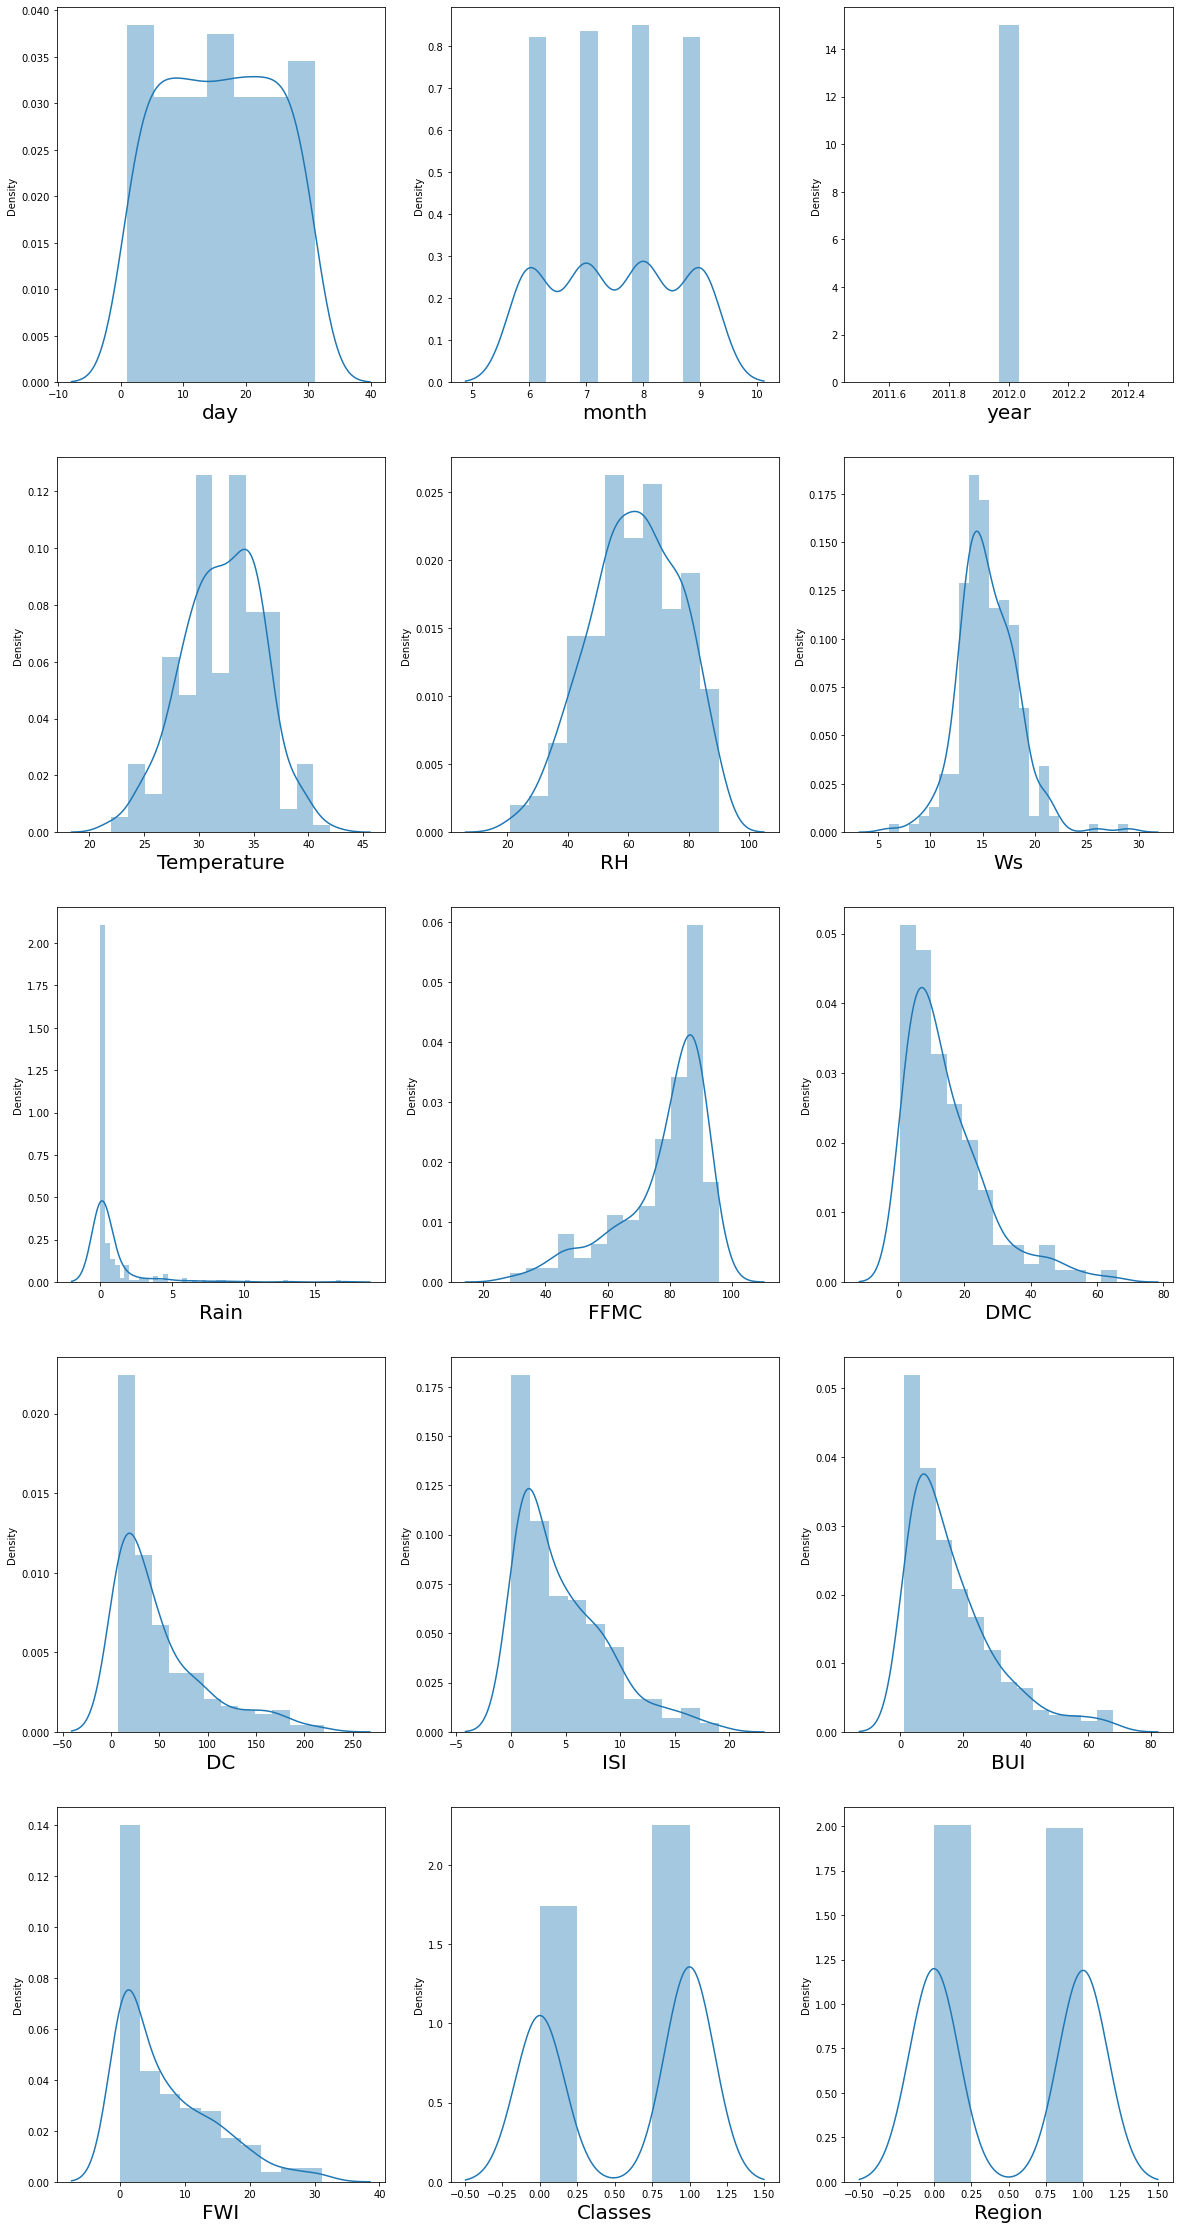

In [24]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column],kde= True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Observation
- Rain, DMC, DC, FWI, ISI, BUI are rightly skewed (log normal distribution)
- There is no variance in the year attribute

## <font color=green>Univariate Analysis</font>

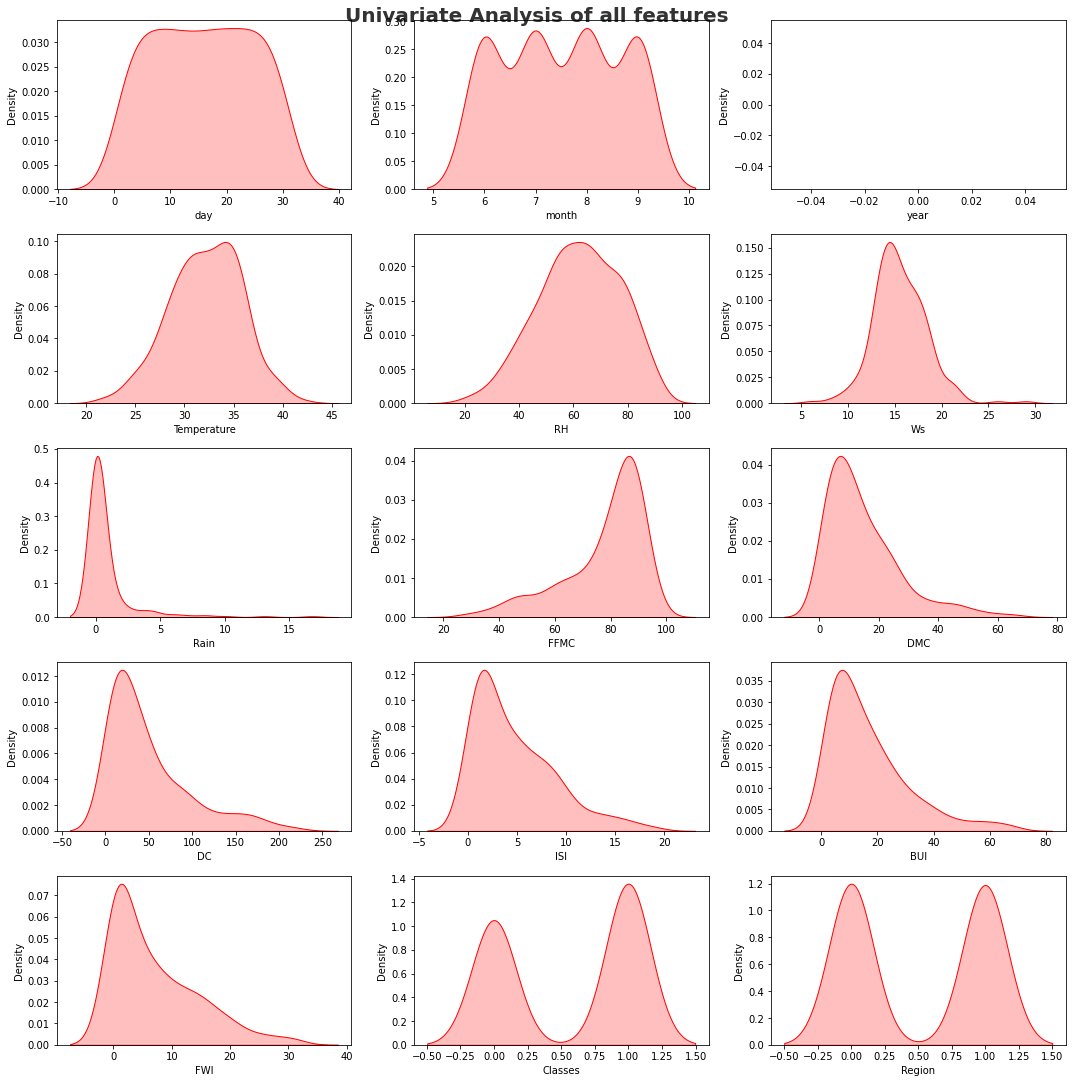

In [25]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of all features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data[data.columns[i]], shade =True, color='r')
    plt.xlabel(data.columns[i])
    plt.tight_layout()

## <font color=green>Multivariate Analysis</font>

<Figure size 1080x1080 with 0 Axes>

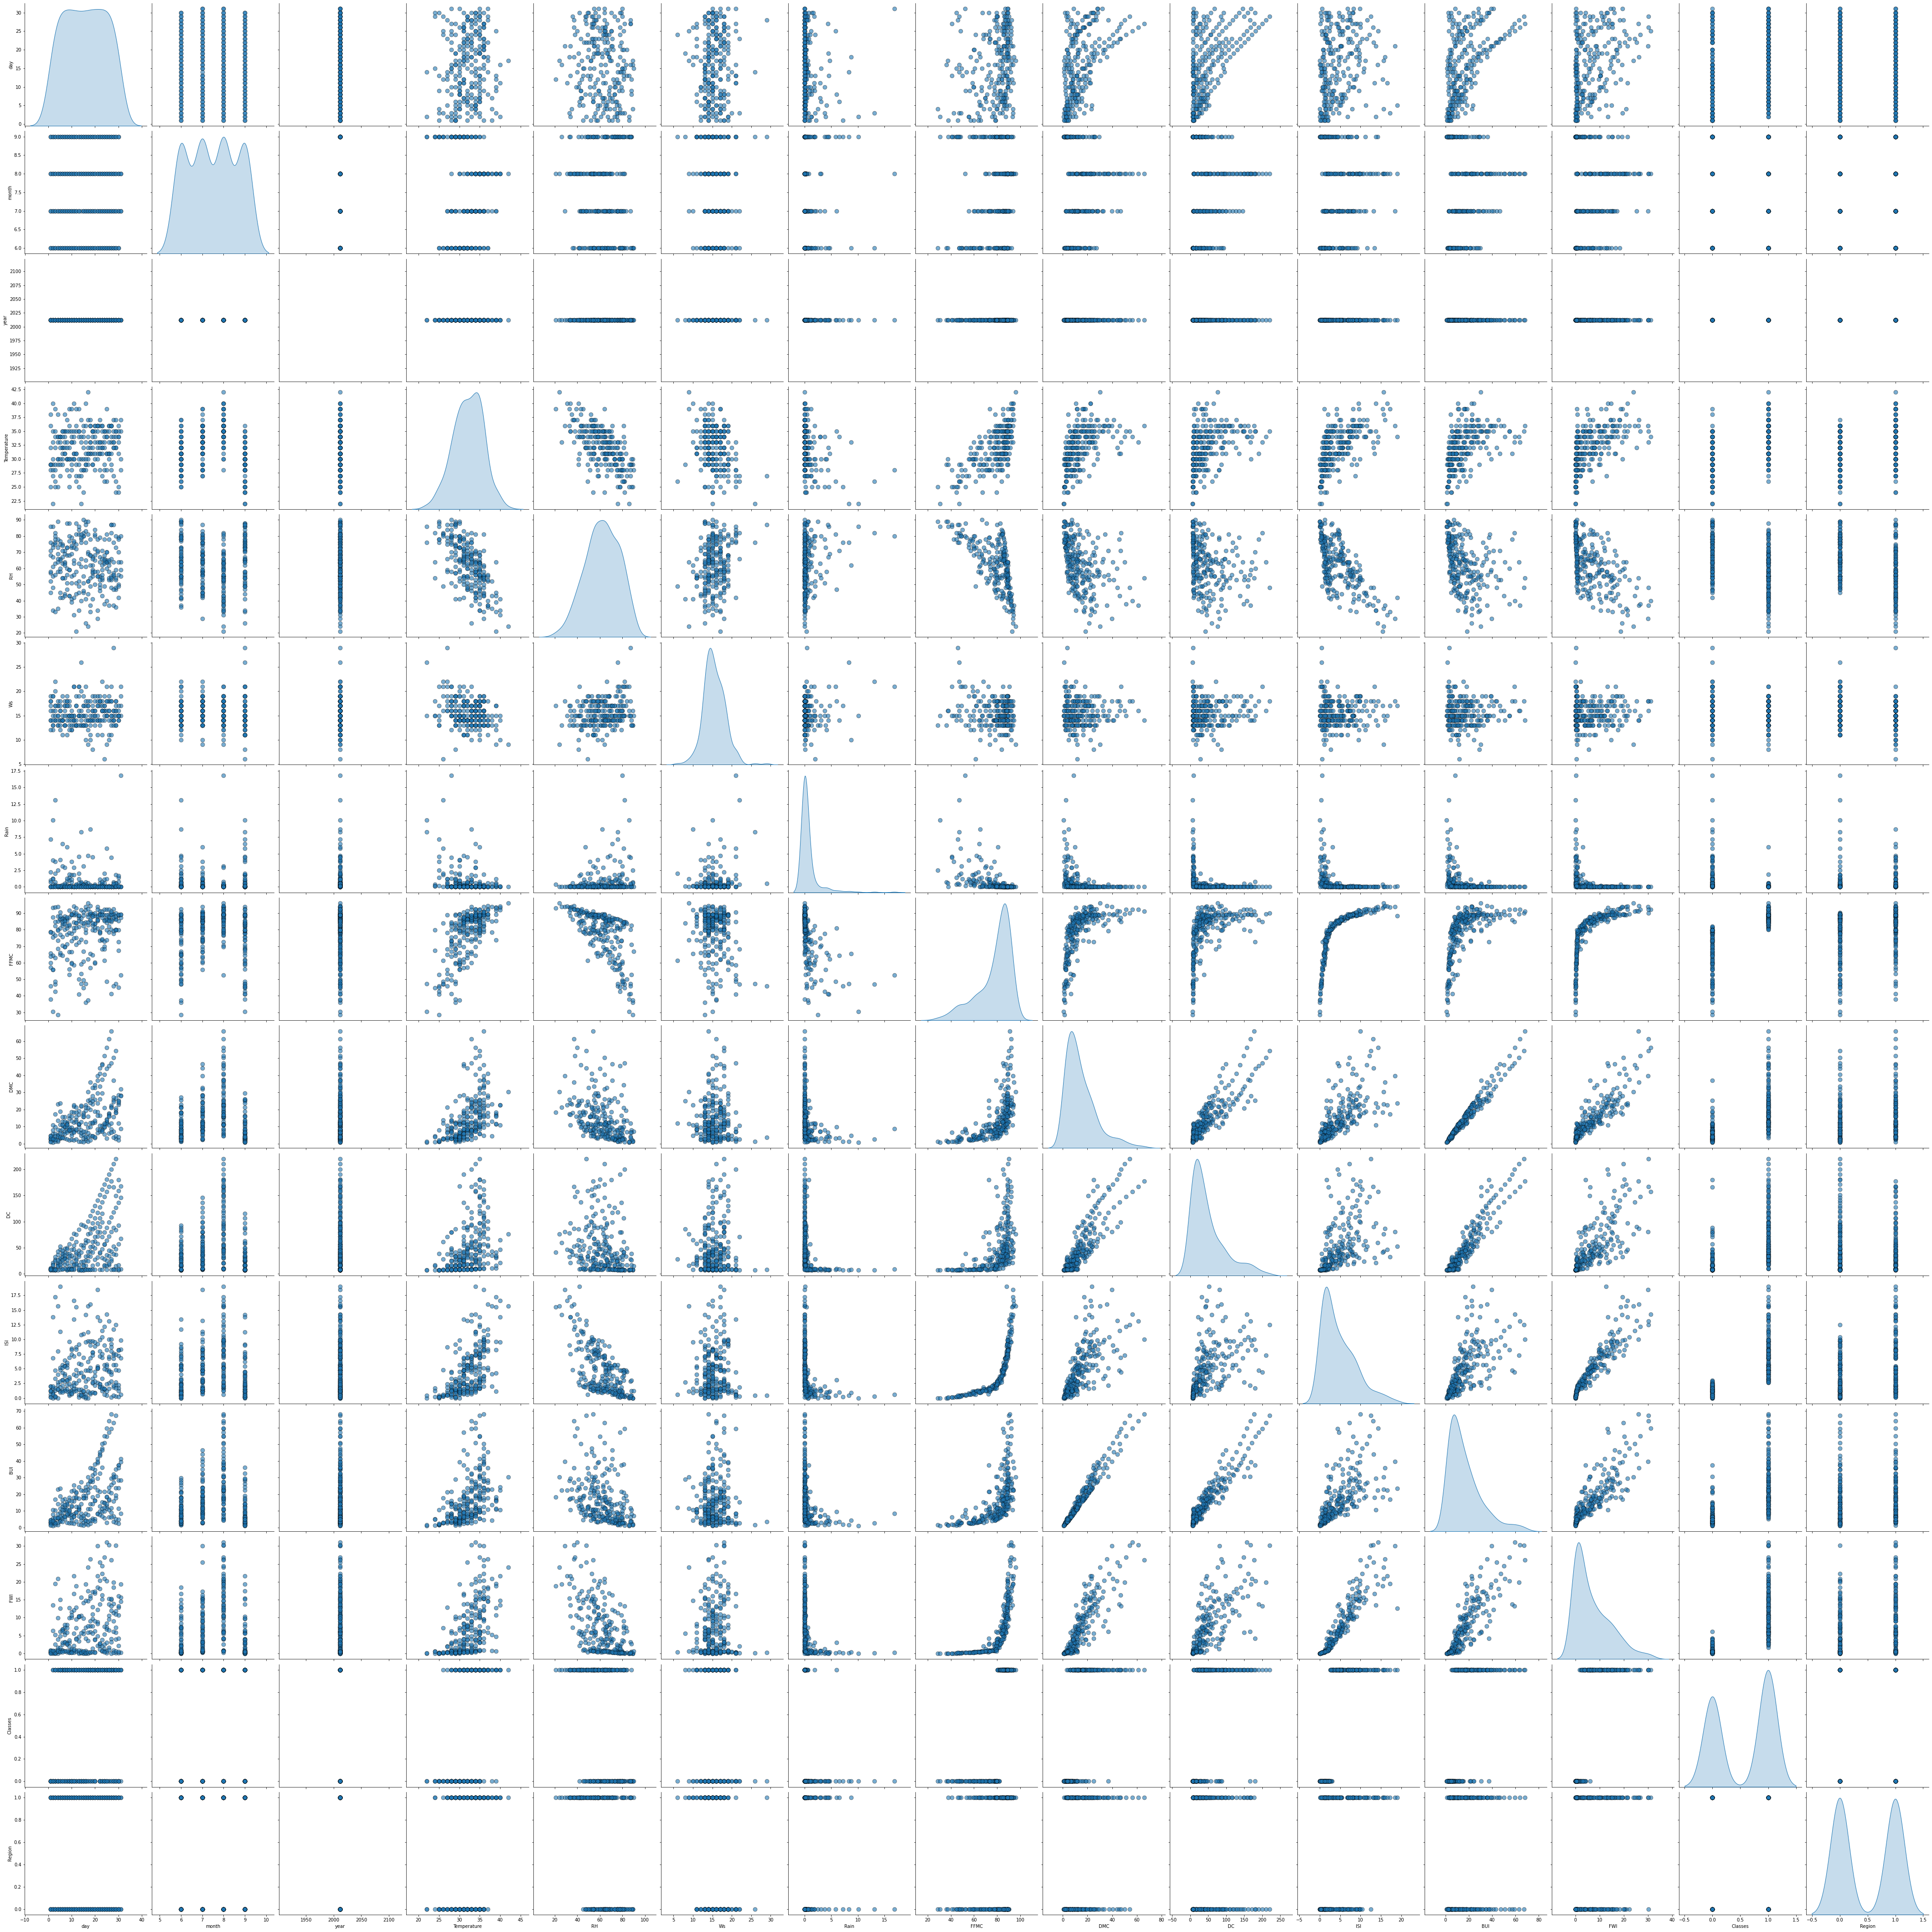

In [26]:
plt.figure(figsize=(15,15))
plt.suptitle('Multivariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(data,  diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [27]:
## Drop Year columns
data.drop("year", axis = 1, inplace = True)

## <font color=green>Heatmap of Correlation</font>

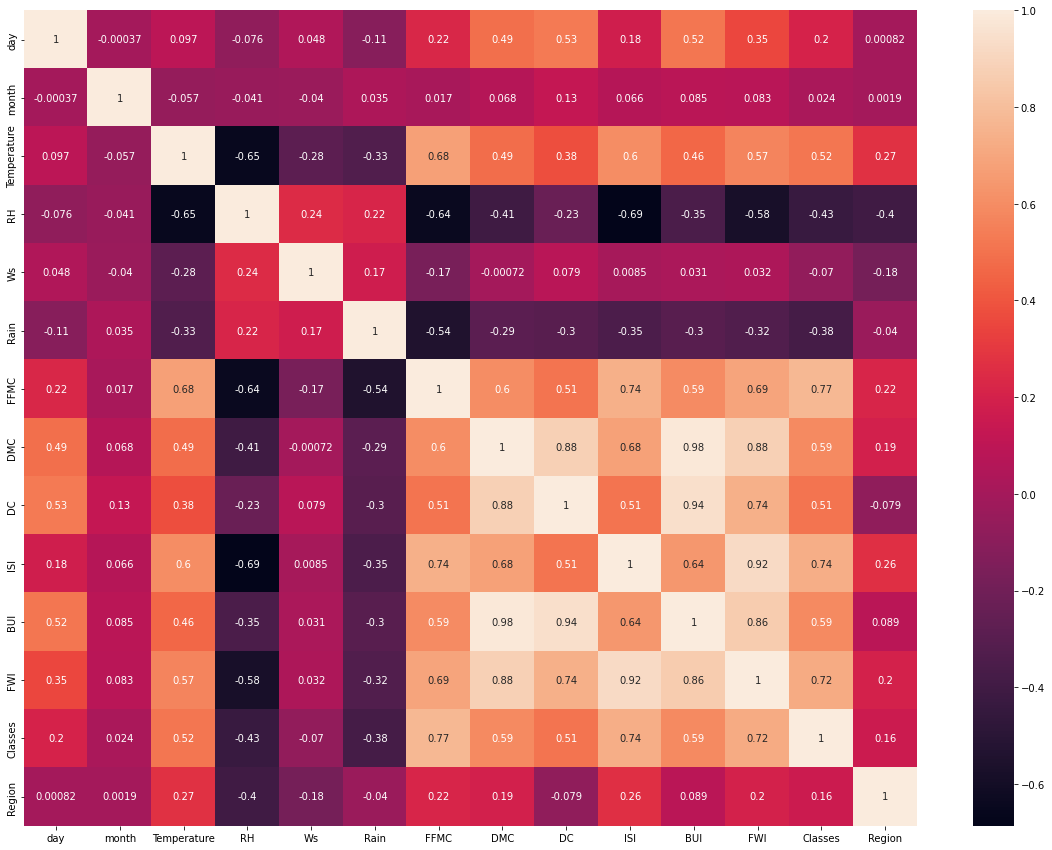

In [28]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(),annot = True)

## <font color=green>Visualisation of Target Feature</font>

In [29]:
data['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

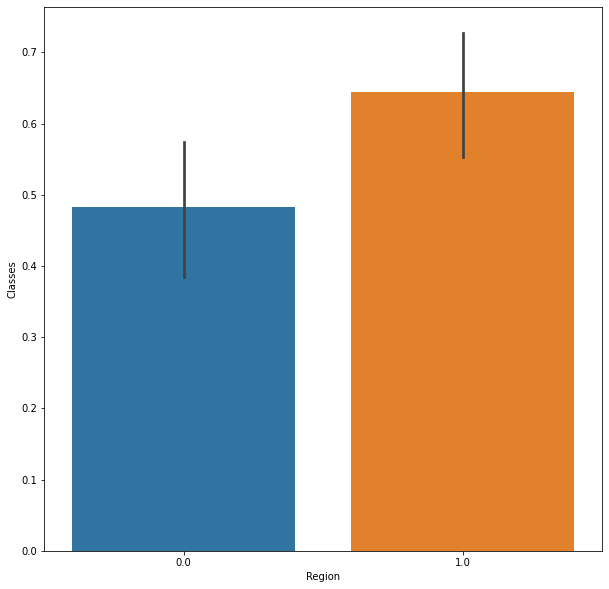

In [30]:
plt.figure(figsize = (10,10))
sns.barplot(x= 'Region', y = 'Classes', data= data)

### Observation
- Sidi-Bel Abbes region has most of the fire happen

## <font color=green>Visualisation of Temperature Feature</font>

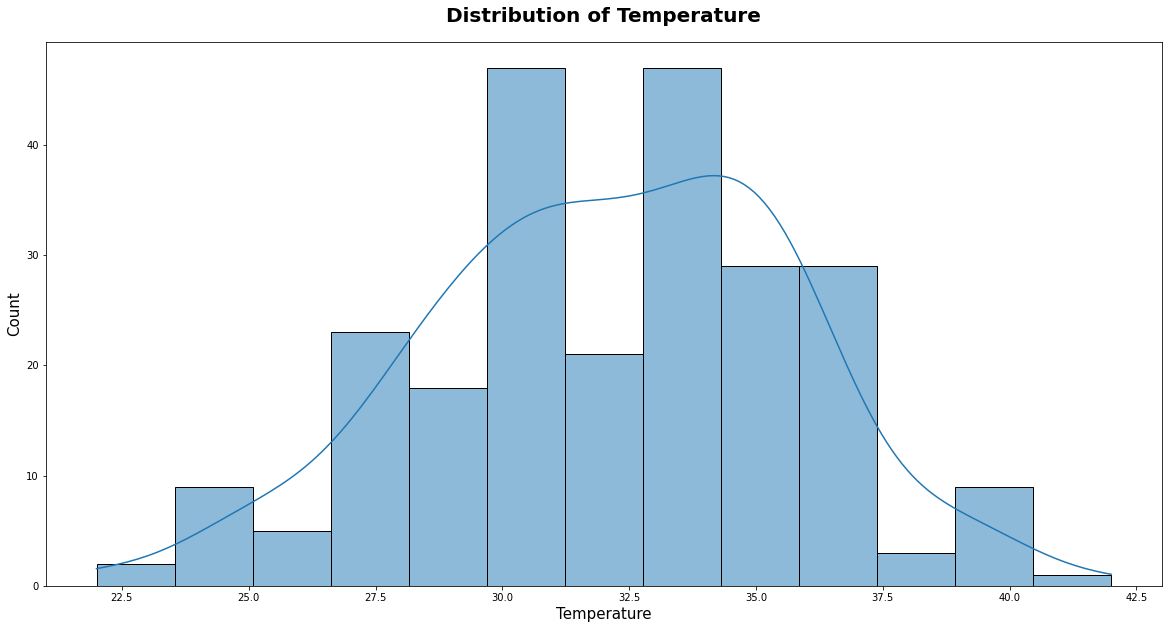

In [31]:
plt.figure(figsize = (20,10))
sns.histplot(data['Temperature'],kde = True)
plt.title("Distribution of Temperature",weight = 'bold',fontsize=20,pad=20)
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

### Observation
- Temperature occur most of the time in range 32.5 to 35.0

## <font color=green>Highest Temperature Attained</font>

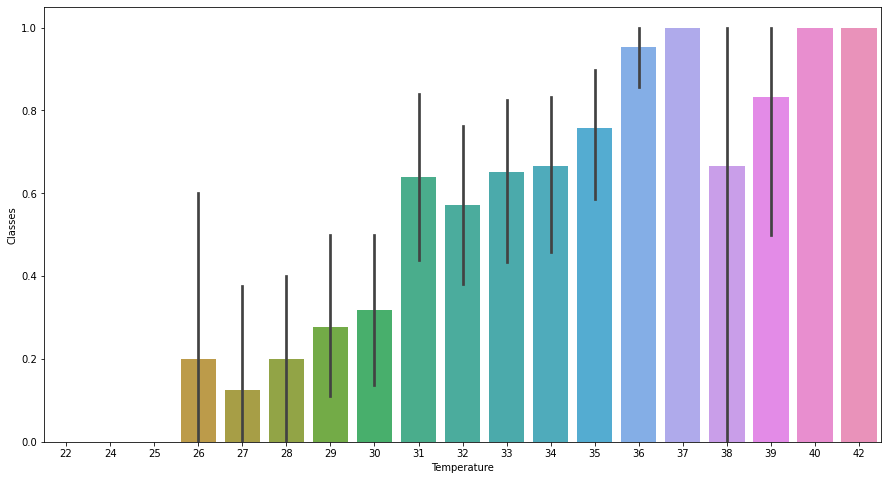

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(x="Temperature",y="Classes",data=data)

### Observation
- Highest Temperature is 37,40 and 42

## <font color=green>Which region is mostly effected by rain</font>

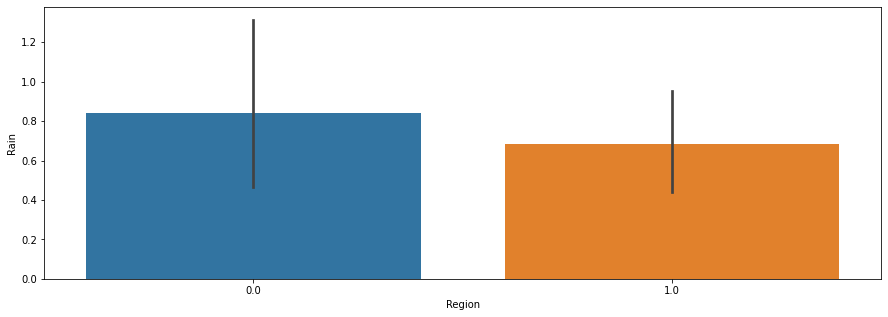

In [33]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['Region'], y = data['Rain'])

### Observation 
- Bejaia is the region in which most of the time rain happens

## <font color=green>Which region is mostly effected by Temperature</font>

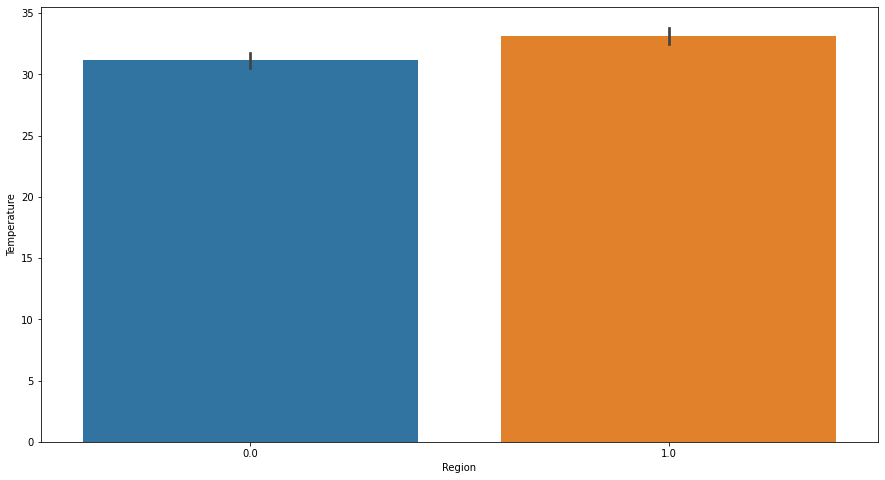

In [34]:
plt.figure(figsize = (15,8))
sns.barplot(x = data['Region'], y = data['Temperature'])

### Obsservation
- Sidi - Bel Abbes region mostly effected by temperature

## <font color=green>Regression Plot</font>

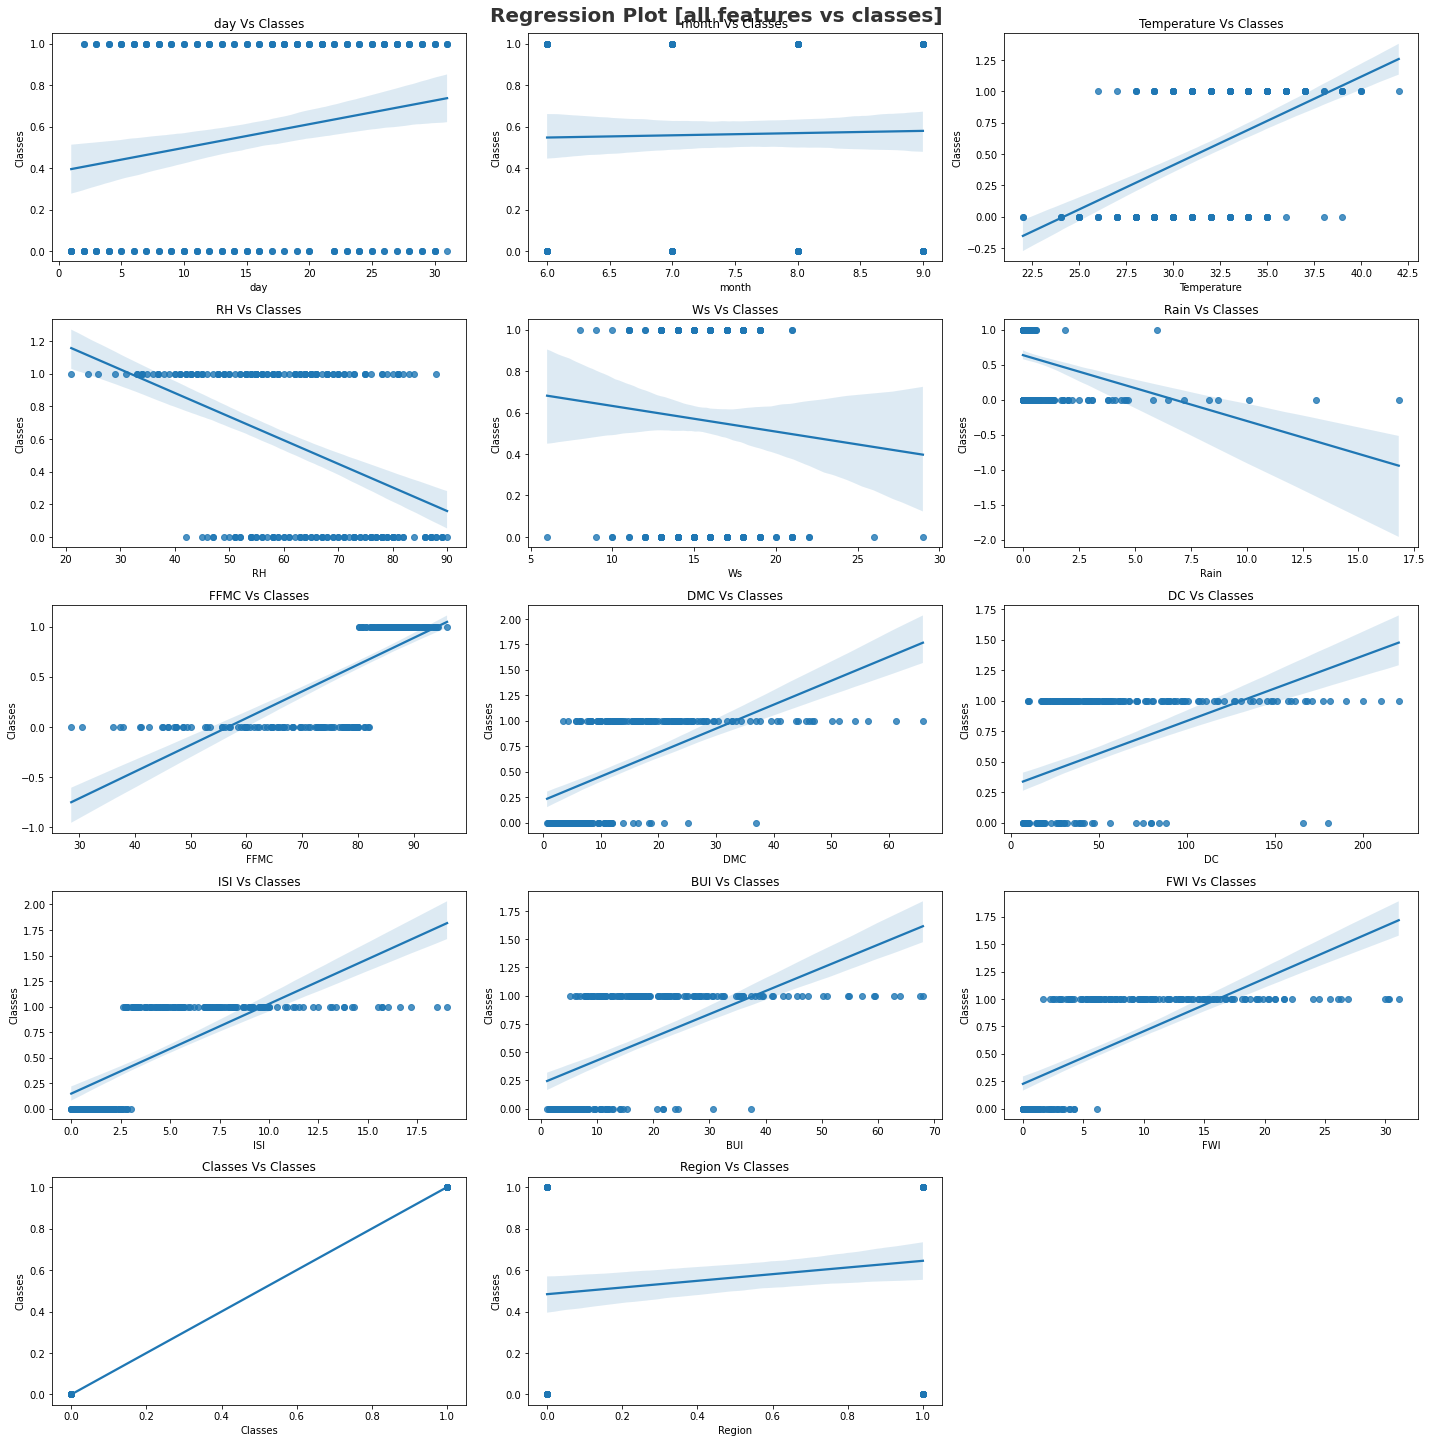

In [39]:
plt.figure(figsize = (20,20))
plt.suptitle('Regression Plot [all features vs classes]', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.regplot(x= data[data.columns[i]],y = data['Classes'], data = data)
    plt.xlabel(data.columns[i])
    plt.ylabel("Classes")
    plt.title("{} Vs Classes".format(data.columns[i]))
    plt.tight_layout()

## <font color=green>Boxplot to find outliers</font>

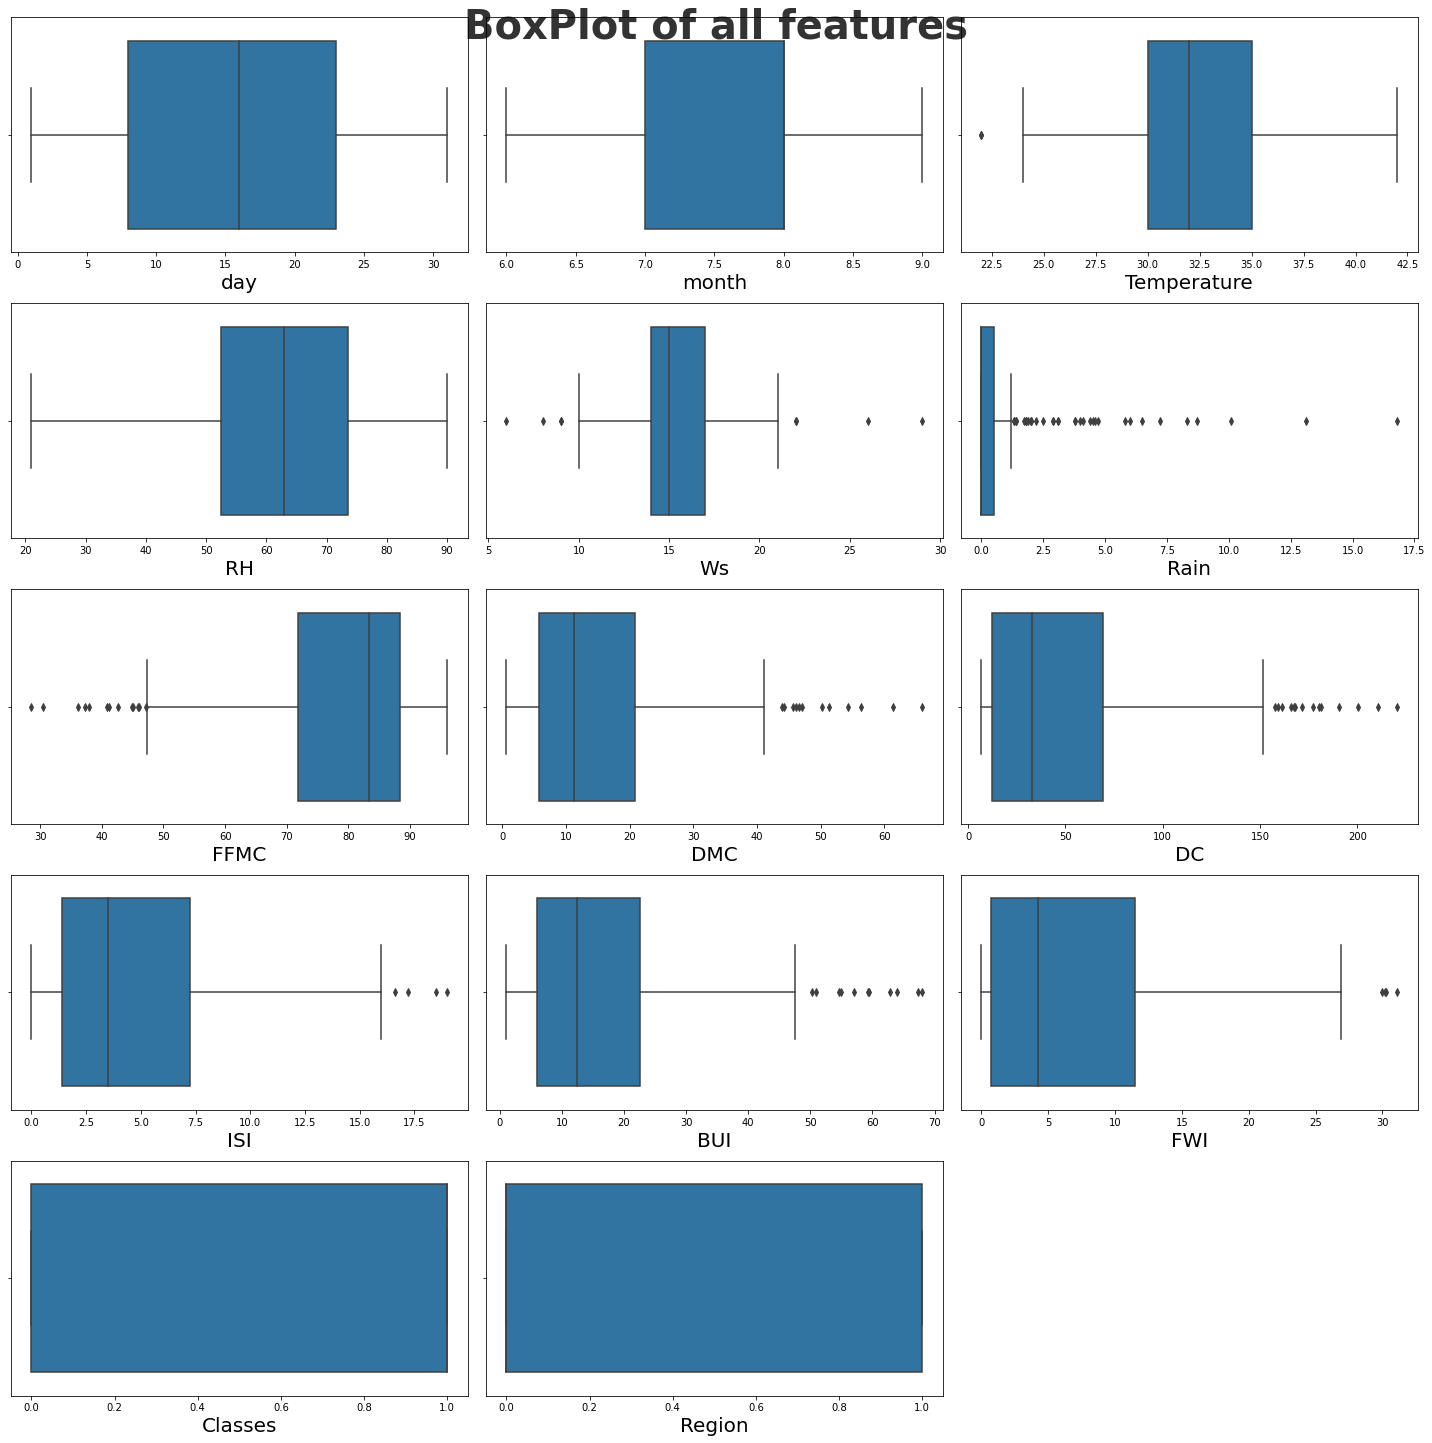

In [40]:
plt.figure(figsize = (20,20))
plt.suptitle('BoxPlot of all features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x= data[data.columns[i]], data = data)
    plt.xlabel(data.columns[i],fontsize = 20)
    #plt.ylabel("Classes")
    #plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

### Observation
- Ws, Rain, FFMC, DMC, DC, BUI has many outliers

## <font color=green>Handling the Outliers</font>

In [41]:
def outliers_imputation_mild(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [42]:
for columns in data:
    outliers_imputation_mild(data,columns)

day --- IQR ---> 15.0
Lower Fence: -14.5
Higher Fence: 45.5
______________________________________________
month --- IQR ---> 1.0
Lower Fence: 5.5
Higher Fence: 9.5
______________________________________________
Temperature --- IQR ---> 5.0
Lower Fence: 22.5
Higher Fence: 42.5
______________________________________________
RH --- IQR ---> 21.0
Lower Fence: 21.0
Higher Fence: 105.0
______________________________________________
Ws --- IQR ---> 3.0
Lower Fence: 9.5
Higher Fence: 21.5
______________________________________________
Rain --- IQR ---> 0.5
Lower Fence: -0.75
Higher Fence: 1.25
______________________________________________
FFMC --- IQR ---> 16.450000000000003
Lower Fence: 47.17499999999999
Higher Fence: 112.975
______________________________________________
DMC --- IQR ---> 14.999999999999996
Lower Fence: -16.699999999999992
Higher Fence: 43.29999999999999
______________________________________________
DC --- IQR ---> 56.74999999999999
Lower Fence: -72.77499999999999
Higher F

## <font color=green>Rechecking the outliers after dropping it</font>

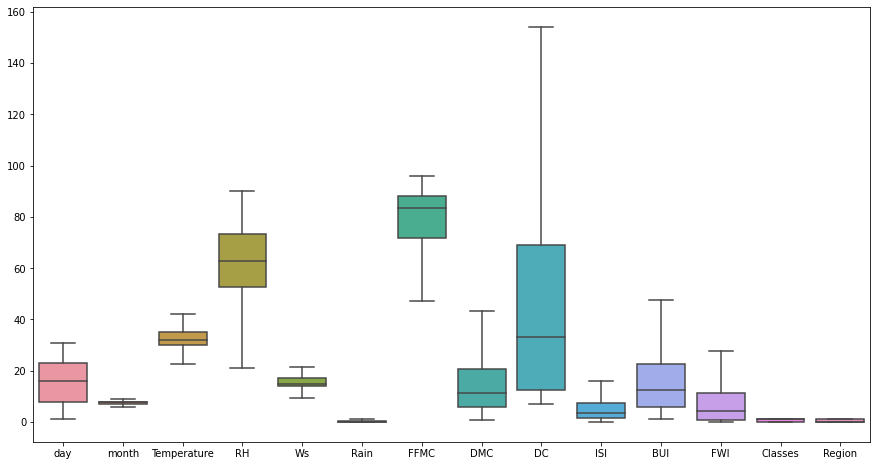

In [43]:
plt.figure(figsize = (15,8))
sns.boxplot(data = data)

### Observation 
- Outlier is not present in any of the feature

## <font color=green>Creating Independent and Dependent Features</font>

In [44]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

### $\color{green}{\text{Independent Features}}$

In [45]:
X.head()

day  month  Temperature  RH    Ws  Rain    FFMC  DMC    DC  ISI  BUI  FWI  \
0  1.0    6.0         29.0  57  18.0  0.00  65.700  3.4   7.6  1.3  3.4  0.5   
1  2.0    6.0         29.0  61  13.0  1.25  64.400  4.1   7.6  1.0  3.9  0.4   
2  3.0    6.0         26.0  82  21.5  1.25  47.175  2.5   7.1  0.3  2.7  0.1   
3  4.0    6.0         25.0  89  13.0  1.25  47.175  1.3   6.9  0.0  1.7  0.0   
4  5.0    6.0         27.0  77  16.0  0.00  64.800  3.0  14.2  1.2  3.9  0.5   

   Region  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

### $\color{green}{\text{Dependent Features}}$

In [46]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Classes, dtype: float64

## <font color=green>Visualizing the relationship between our independent and dependent features</font>

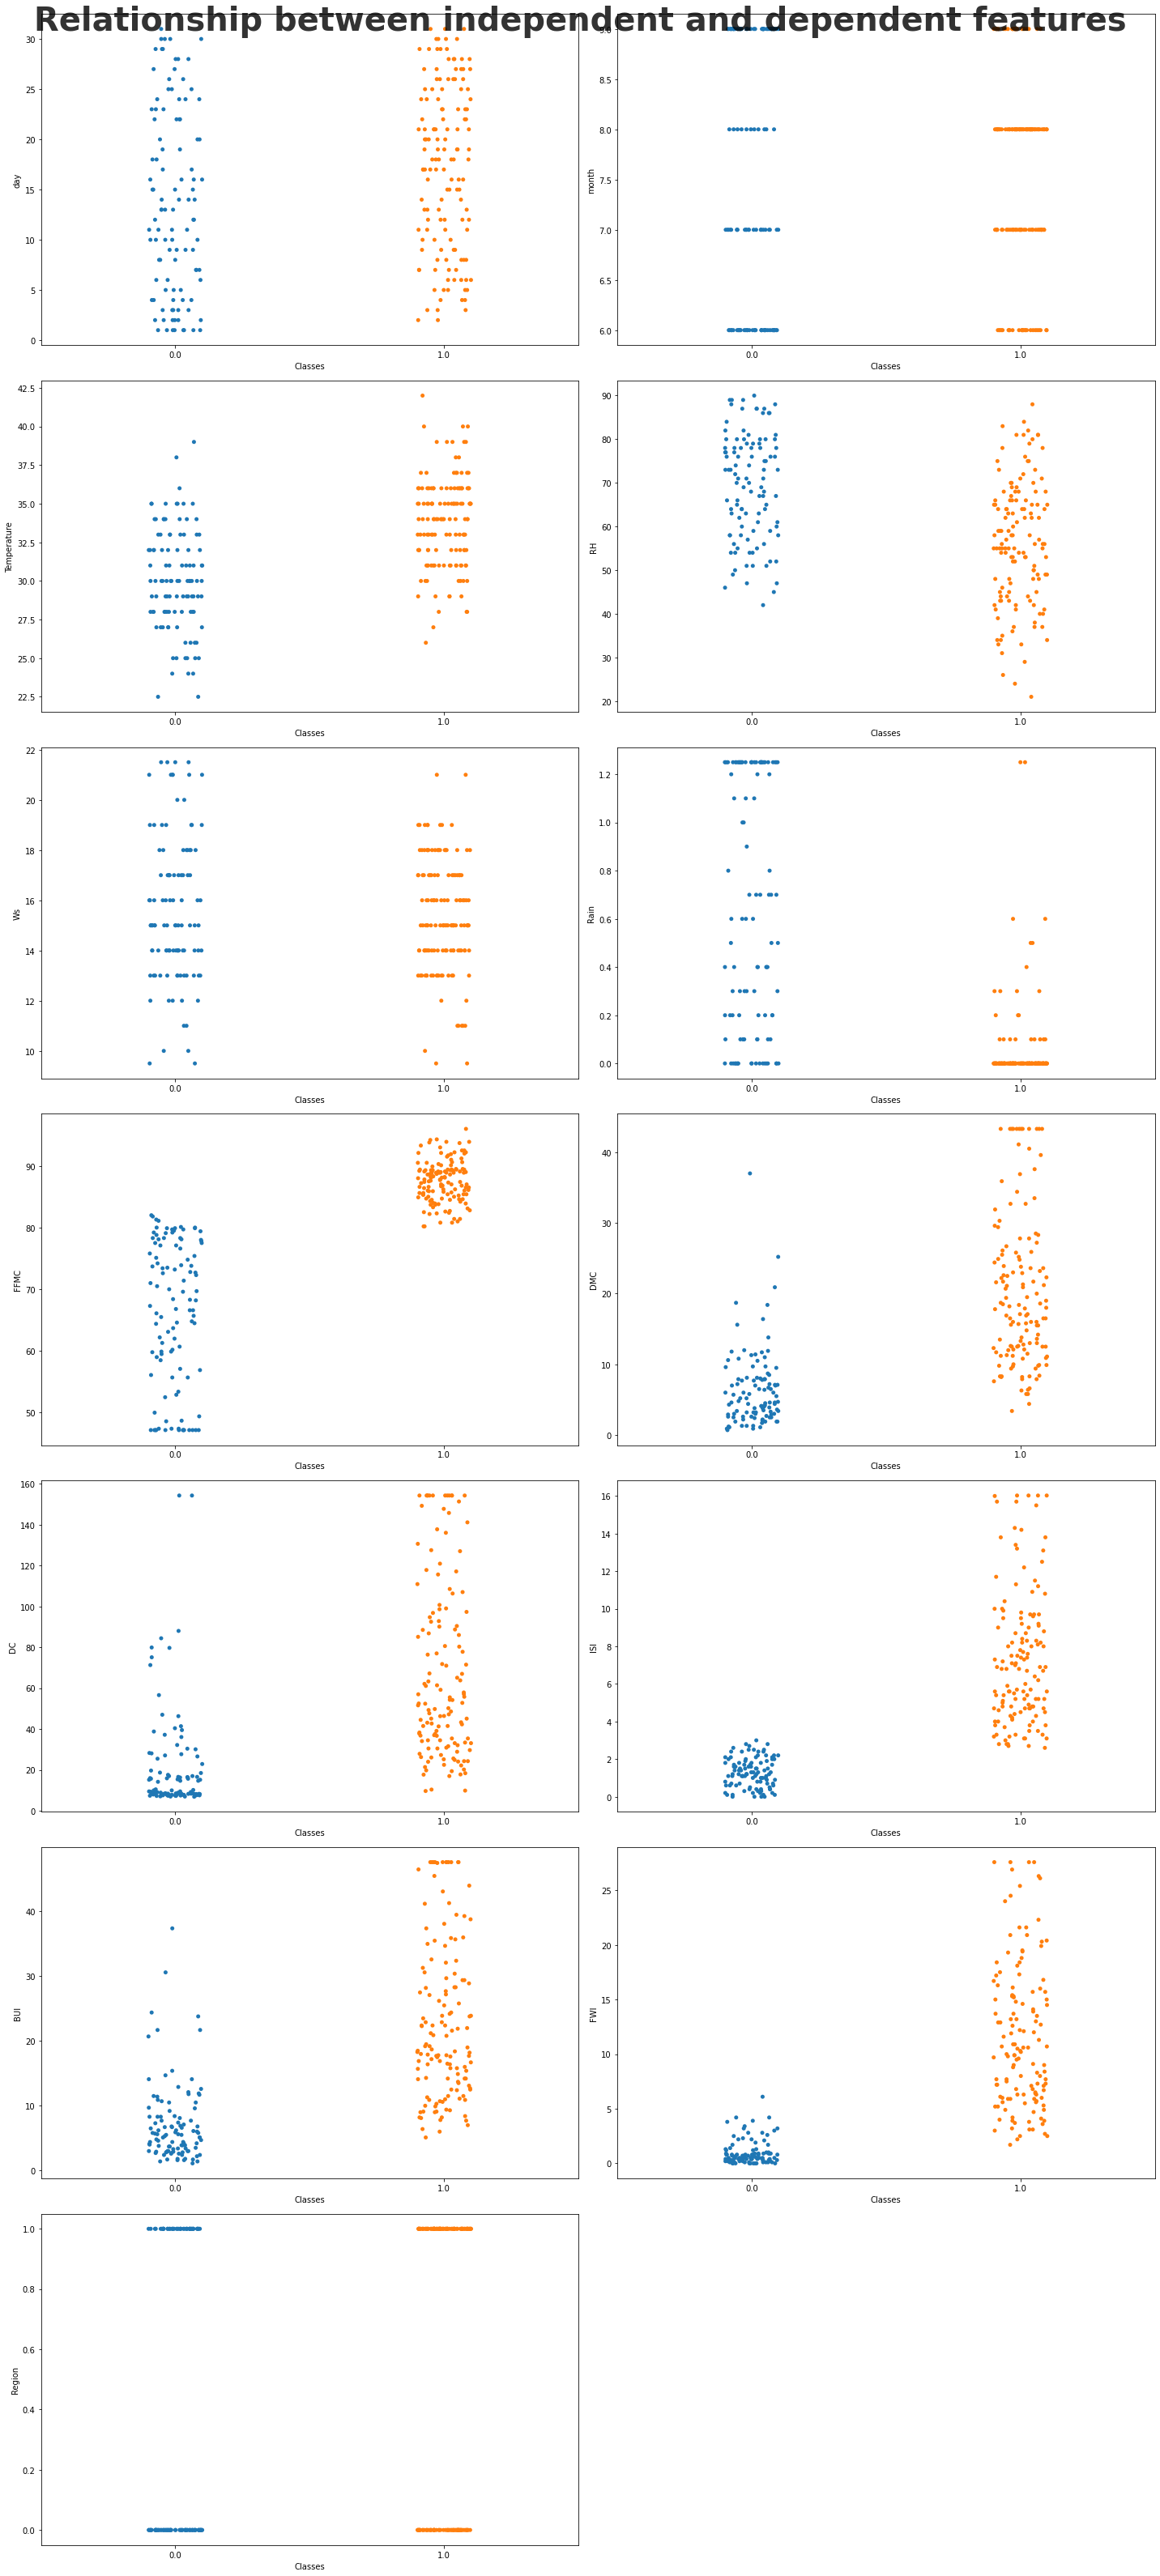

In [47]:
plt.figure(figsize=(20,50), facecolor='white')
plt.suptitle('Relationship between independent and dependent features', fontsize = 40, fontweight = "bold", alpha = 0.8, y = 1.)
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

## <font color=green>Importing sklearn libraries for machine learning</font>

In [48]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## <font color=green>Train Test Split</font>

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

## <font color=green>Logistic Regression Model Training</font>

In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [51]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [52]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring = 'accuracy',cv=5)

## <font color=green>Standardizing or Feature Selection</font>

In [53]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
print(classifier_regressor.best_params_)      ## Best Parameter

{'C': 40, 'max_iter': 100, 'penalty': 'l2'}


In [55]:
print(classifier_regressor.best_score_)       ## Best Score

0.9615615615615616


## <font color=green>Prediction</font>

In [56]:
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

## <font color=green>Accuracy Score</font>

In [57]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print(score)

0.9672131147540983


## <font color=green>Classification Report</font>

In [58]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        24
         1.0       0.97      0.97      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



## Performance Matrix

## <font color=green>Confusion Matrix</font>

In [59]:
conf_Max = confusion_matrix(y_pred,y_test)
conf_Max

array([[23,  1],
       [ 1, 36]])

In [60]:
true_positive = conf_Max[0][0]
false_positive = conf_Max[0][1]
false_negative = conf_Max[1][0]
true_negative = conf_Max[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 23
false_positive: 1
true_negative: 36
false_negative: 1


## <font color=green>Calculate using theorical formula of Accuracy, Precision, Recall, F1-score</font>

In [61]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

## <font color=green>Precision</font>

In [62]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9583333333333334

## <font color=green>Recall</font>

In [63]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9583333333333334

## <font color=green>F1-Score</font>

In [64]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9583333333333334

## <font color=green>Area Under Curve</font>

In [65]:
auc = roc_auc_score(y_pred, y_test)
auc

0.9656531531531533

## <font color=green>Roc</font>

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

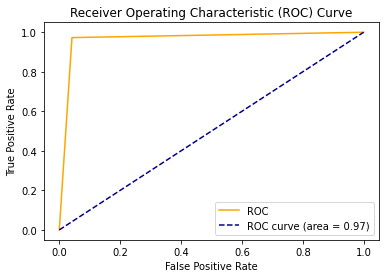

In [67]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### <div class="alert alert-warning">What is the significance of Roc curve and AUC?</div>
In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

## <font color=green>Creating Inbalance dataset from the original balanced dataset</font>

In [68]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0     0.0  
1  0.4        0     0.0  
2  0.1        0     0.0  
3  0.0        0     0.0  
4  0.5        0     0.0

In [69]:
df.shape

(243, 15)

In [70]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
X1 = pd.DataFrame(df, columns = ['day', 'month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])
y1=pd.DataFrame(df,columns = ['Classes'])

In [71]:
X1.head()

day  month  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0    1      6           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

   Region  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [72]:
y1.head()

Classes
0        0
1        0
2        0
3        0
4        0

In [73]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X1, y1, test_size=0.10, random_state=17)

In [74]:
## Both will have same shape
X_train_imb.shape, y_train_imb.shape

((218, 13), (218, 1))

## <font color=green>Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance</font>

In [75]:
y_train_imb = y_train_imb.replace(0,1)
y_train_imb.head()

Classes
158        1
186        1
11         1
75         1
132        1

In [76]:
y_test_imb = y_test_imb.replace(1,0)
y_test_imb.head()

Classes
48         0
219        0
101        0
38         0
86         0

In [77]:
X_train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  
158  15.0     1.0  
186  13.5     1.0  
11    7.1     0.0  
75    6.3     0.0  
132   1.9     1.0

In [78]:
## Combining X_train_imb and y_train_imb
train_imb = X_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  \
158    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7   
186    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6   
11    12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   
75    15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   
132    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   

      FWI  Region  Classes  
158  15.0     1.0        1  
186  13.5     1.0        1  
11    7.1     0.0        1  
75    6.3     0.0        1  
132   1.9     1.0        1

In [79]:
## Combining X_test_imb with y_test_imb
test_imb = X_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
48    19      7           35  59  17   0.0  88.1  12.0   52.8  7.7  18.2   
219    4      9           30  66  15   0.2  73.5   4.1   26.6  1.5   6.0   
101   10      9           33  73  12   1.8  59.9   2.2    8.9  0.7   2.7   
38     9      7           32  68  14   1.4  66.6   7.7    9.2  1.1   7.4   
86    26      8           31  78  18   0.0  85.8  45.6  190.6  4.7  57.1   

      FWI  Region  Classes  
48   10.9     0.0        0  
219   0.7     1.0        0  
101   0.3     0.0        0  
38    0.6     0.0        0  
86   13.7     0.0        0

In [80]:
### Checking the shape of imbalanced Data
train_imb.shape, test_imb.shape

((218, 14), (25, 14))

In [81]:
### Combining train_imb dataset and test_imb dataset into data_imb dataset
df_imb= pd.concat([train_imb, test_imb],ignore_index = True, sort = False)
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

In [82]:
df_imb.shape

(243, 14)

## <font color=green>Checking the inbalancing</font>

In [83]:
df_imb.Classes.value_counts()

1    218
0     25
Name: Classes, dtype: int64

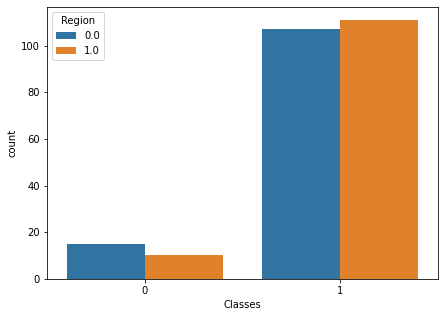

In [84]:
## 0 is 'Bejaia' and 1 is 'Sidi Bel-abbes region'
plt.figure(figsize = (7,5))
sns.countplot(data = df_imb, x= 'Classes', hue = 'Region')

## <font color=green>Logistic regression on inbalance data</font>

In [85]:
df_imb.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <font color=green>Separating Independent and Dependent feature</font>

In [86]:
y1 = df_imb['Classes']
X1 = df_imb.drop(columns = 'Classes')

In [87]:
X1.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [88]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

## <font color=green>Handling Inbalance dataset by doing Upsampling</font>

In [89]:
### for Upsampling
from imblearn.combine import SMOTETomek

In [90]:
smk = SMOTETomek()
smk

SMOTETomek()

In [91]:
X_bal,y_bal=smk.fit_resample(X1,y1)

In [92]:
X_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  
0     1.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [93]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

In [94]:
X_bal.shape,y_bal.shape

((422, 13), (422,))

In [95]:
## Creating Balanced data from inbalanced data
data_bal = X_bal.join(pd.DataFrame(y_bal))
data_bal.head()

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  \
0    5      7           34  45  18   0.0  90.5  18.7  46.4  11.3  18.7  15.0   
1    2      8           40  34  14   0.0  93.3  10.8  21.4  13.8  10.6  13.5   
2   12      6           26  81  19   0.0  84.0  13.8  61.4   4.8  17.7   7.1   
3   15      8           36  55  13   0.3  82.4  15.6  92.5   3.7  22.0   6.3   
4    9      6           27  59  18   0.1  78.1   8.5  14.7   2.4   8.3   1.9   

   Region  Classes  
0     1.0        1  
1     1.0        1  
2     0.0        1  
3     0.0        1  
4     1.0        1

## <font color=green>EDA on balanced dataset</font>

In [96]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          422 non-null    int64  
 1   month        422 non-null    int64  
 2   Temperature  422 non-null    int64  
 3   RH           422 non-null    int64  
 4   Ws           422 non-null    int64  
 5   Rain         422 non-null    float64
 6   FFMC         422 non-null    float64
 7   DMC          422 non-null    float64
 8   DC           422 non-null    float64
 9   ISI          422 non-null    float64
 10  BUI          422 non-null    float64
 11  FWI          422 non-null    float64
 12  Region       422 non-null    float64
 13  Classes      422 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 46.3 KB


## <font color=green>Statistical analysis on balanced dataset</font>

In [97]:
data_bal.describe().T

count       mean        std   min        25%        50%  \
day          422.0  15.149289   8.577659   1.0   8.000000  15.000000   
month        422.0   7.464455   0.999961   6.0   7.000000   7.000000   
Temperature  422.0  32.421801   3.283486  22.0  30.000000  32.000000   
RH           422.0  61.715640  14.282348  21.0  53.000000  64.000000   
Ws           422.0  15.379147   2.638711   6.0  14.000000  15.000000   
Rain         422.0   0.562758   1.563924   0.0   0.000000   0.042831   
FFMC         422.0  78.773982  12.822564  28.6  71.540050  83.887285   
DMC          422.0  15.548851  13.242077   0.7   5.800000  12.291537   
DC           422.0  55.787974  51.376874   6.9  15.250000  38.950000   
ISI          422.0   4.882861   3.956842   0.0   1.383757   4.288927   
BUI          422.0  18.138096  15.433202   1.1   6.019487  15.150000   
FWI          422.0   7.489339   7.322842   0.0   0.700000   5.900000   
Region       422.0   0.432285   0.461291   0.0   0.000000   0.145746   
Classes      422.0   0.500000   0.500593   0.0   0.000000   0.500000   

                   75%    max  
day          23.000000   31.0  
month         8.000000    9.0  
Temperature  35.000000   42.0  
RH           72.000000   90.0  
Ws           17.000000   29.0  
Rain          0.400000   16.8  
FFMC         88.100000   96.0  
DMC          20.900000   65.9  
DC           82.793169  220.4  
ISI           7.374863   19.0  
BUI          24.309528   68.0  
FWI          12.192028   31.1  
Region        1.000000    1.0  
Classes       1.000000    1.0

In [98]:
data_bal.corr()

day     month  Temperature        RH        Ws      Rain  \
day          1.000000 -0.037457     0.169130 -0.105147  0.096770 -0.102440   
month       -0.037457  1.000000    -0.077171  0.051348 -0.004783  0.029146   
Temperature  0.169130 -0.077171     1.000000 -0.671644 -0.280865 -0.291276   
RH          -0.105147  0.051348    -0.671644  1.000000  0.228693  0.202461   
Ws           0.096770 -0.004783    -0.280865  0.228693  1.000000  0.086803   
Rain        -0.102440  0.029146    -0.291276  0.202461  0.086803  1.000000   
FFMC         0.298228  0.028331     0.670956 -0.626125 -0.034958 -0.526009   
DMC          0.580949  0.089835     0.448670 -0.313463  0.113611 -0.263994   
DC           0.618797  0.131840     0.334727 -0.175822  0.230708 -0.290271   
ISI          0.272546  0.080284     0.645870 -0.696789  0.050383 -0.339234   
BUI          0.607321  0.100718     0.417660 -0.266536  0.165122 -0.279350   
FWI          0.447430  0.107513     0.593136 -0.564891  0.103047 -0.320568   
Region      -0.009039  0.036967     0.288272 -0.414643 -0.201779 -0.023143   
Classes      0.098189  0.009490    -0.127169  0.013289  0.052148  0.173722   

                 FFMC       DMC        DC       ISI       BUI       FWI  \
day          0.298228  0.580949  0.618797  0.272546  0.607321  0.447430   
month        0.028331  0.089835  0.131840  0.080284  0.100718  0.107513   
Temperature  0.670956  0.448670  0.334727  0.645870  0.417660  0.593136   
RH          -0.626125 -0.313463 -0.175822 -0.696789 -0.266536 -0.564891   
Ws          -0.034958  0.113611  0.230708  0.050383  0.165122  0.103047   
Rain        -0.526009 -0.263994 -0.290271 -0.339234 -0.279350 -0.320568   
FFMC         1.000000  0.600375  0.549087  0.775853  0.599783  0.734746   
DMC          0.600375  1.000000  0.906654  0.632363  0.985599  0.850703   
DC           0.549087  0.906654  1.000000  0.523928  0.959274  0.762078   
ISI          0.775853  0.632363  0.523928  1.000000  0.609770  0.925147   
BUI          0.599783  0.985599  0.959274  0.609770  1.000000  0.839473   
FWI          0.734746  0.850703  0.762078  0.925147  0.839473  1.000000   
Region       0.210279  0.146419 -0.089825  0.268828  0.050496  0.191560   
Classes     -0.086114 -0.083528 -0.156374 -0.033437 -0.118995 -0.071892   

               Region   Classes  
day         -0.009039  0.098189  
month        0.036967  0.009490  
Temperature  0.288272 -0.127169  
RH          -0.414643  0.013289  
Ws          -0.201779  0.052148  
Rain        -0.023143  0.173722  
FFMC         0.210279 -0.086114  
DMC          0.146419 -0.083528  
DC          -0.089825 -0.156374  
ISI          0.268828 -0.033437  
BUI          0.050496 -0.118995  
FWI          0.191560 -0.071892  
Region       1.000000  0.172684  
Classes      0.172684  1.000000

In [99]:
num_data_bal = [fea for fea in data_bal.columns if data_bal[fea].dtype != 'O']
num_data_bal

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes']

## <font color=green>Compairing the distribution in feature for Original and Balanced dataset</font>

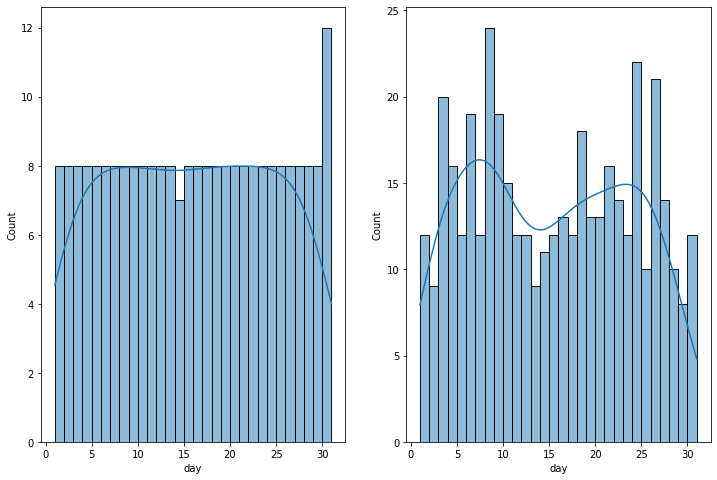

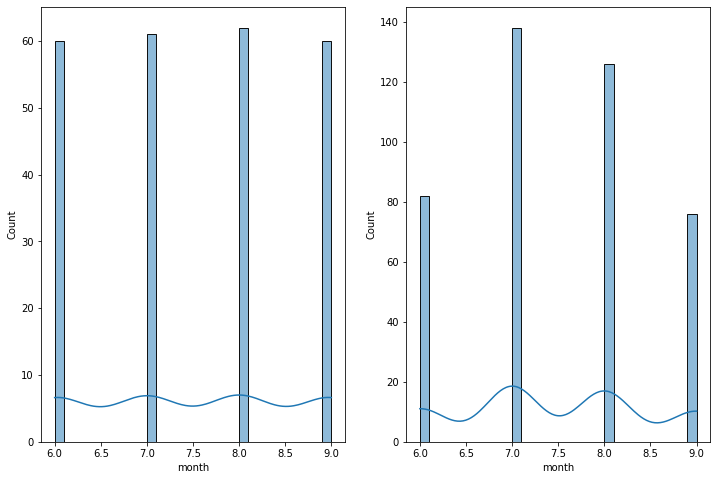

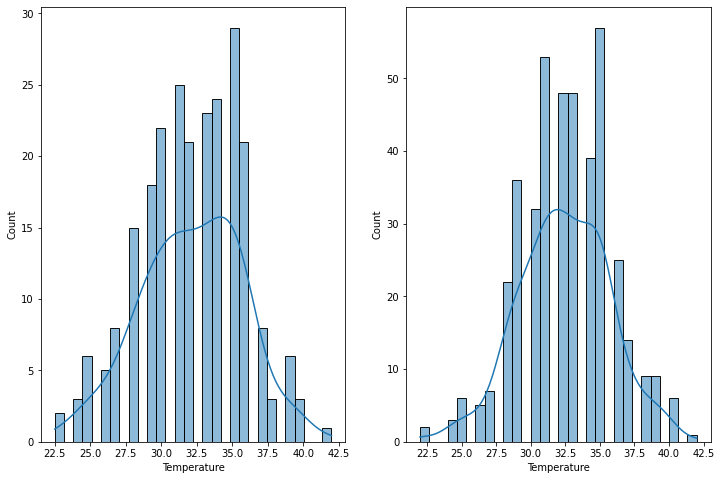

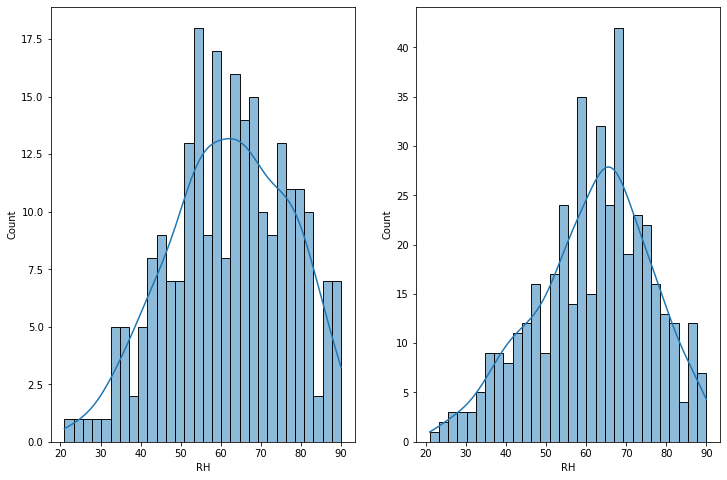

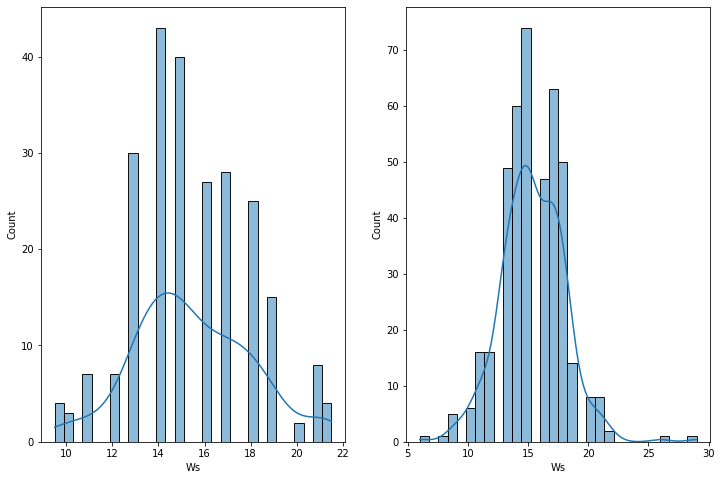

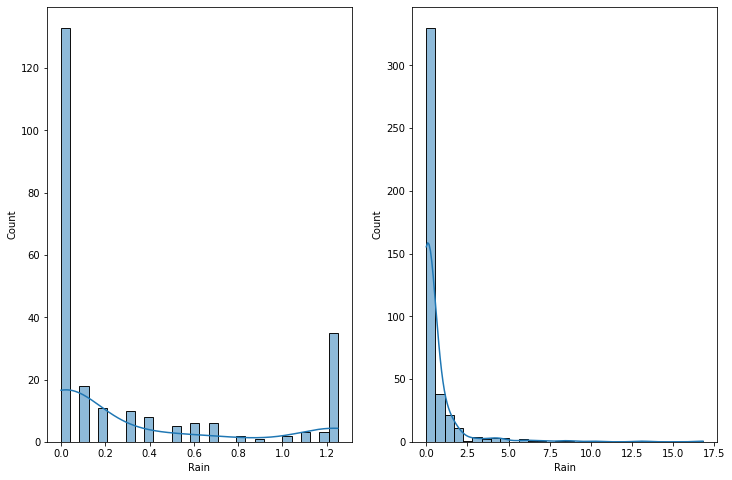

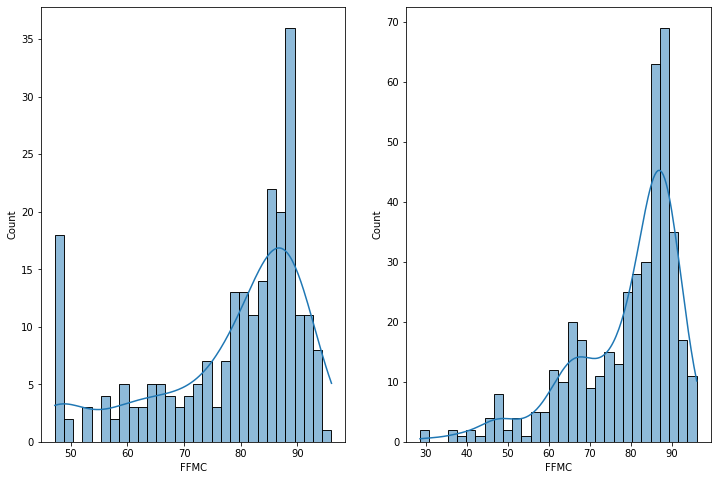

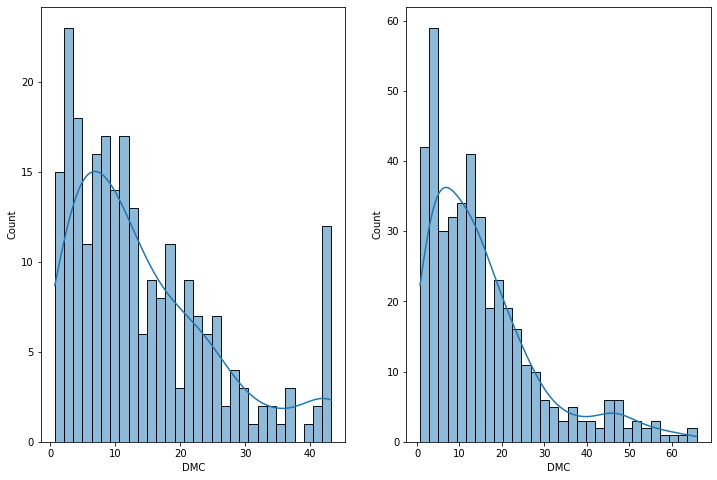

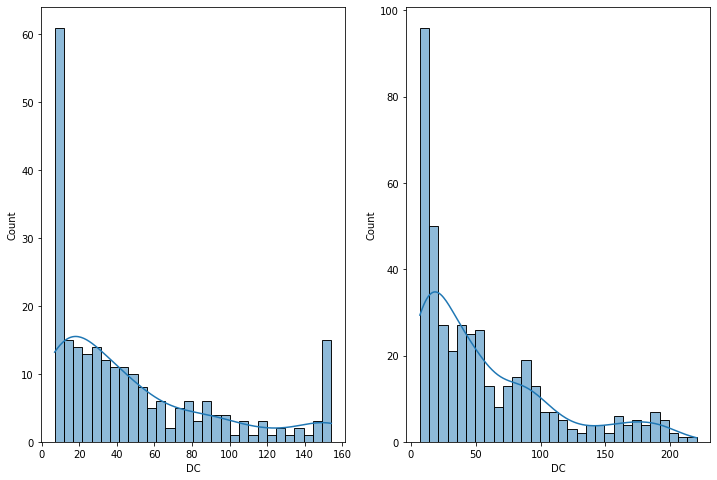

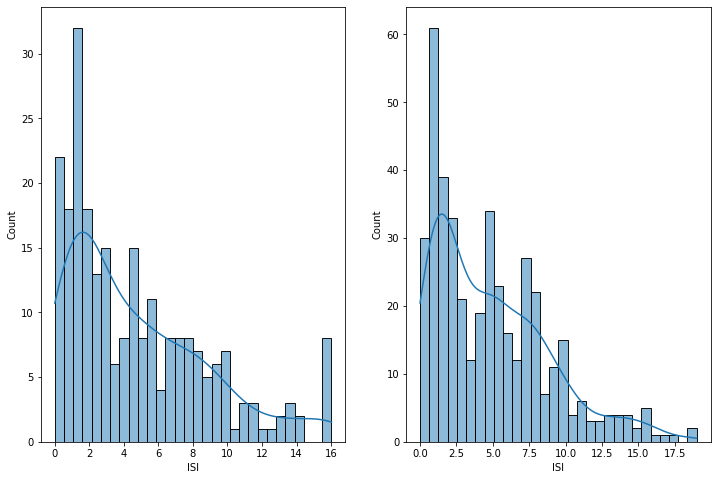

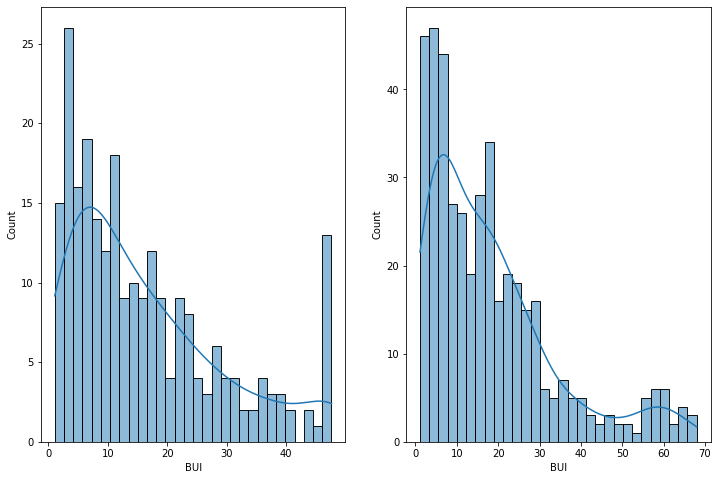

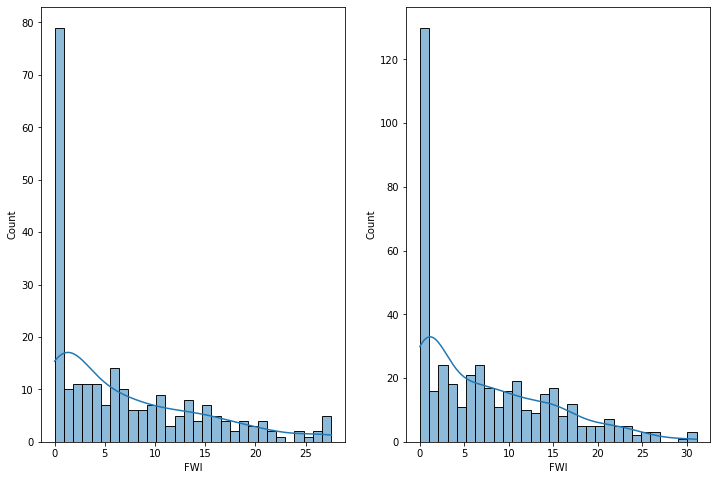

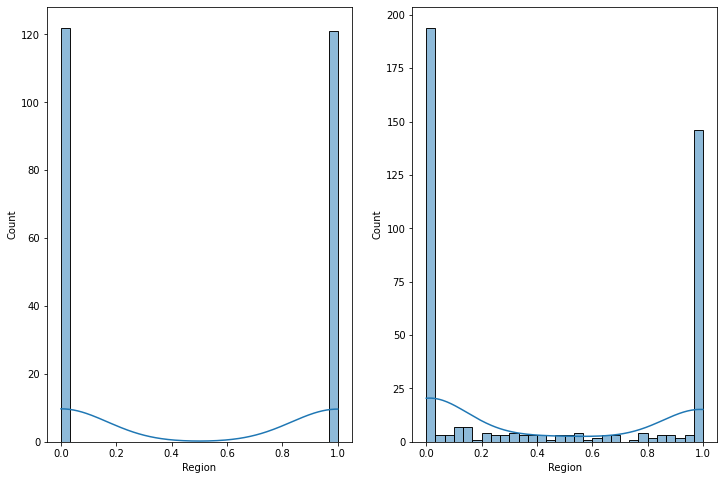

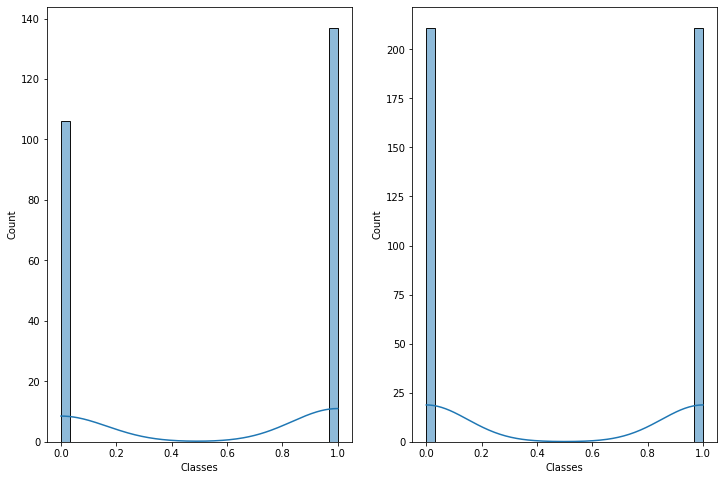

In [100]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.histplot(data = data,x = i, kde = True,bins = 30)
    
    plt.subplot(122)
    sns.histplot(data =data_bal , x = i, kde = True, bins = 30)

## <font color=green>Checking the Outliers for Original and Balanced Dataset</font>

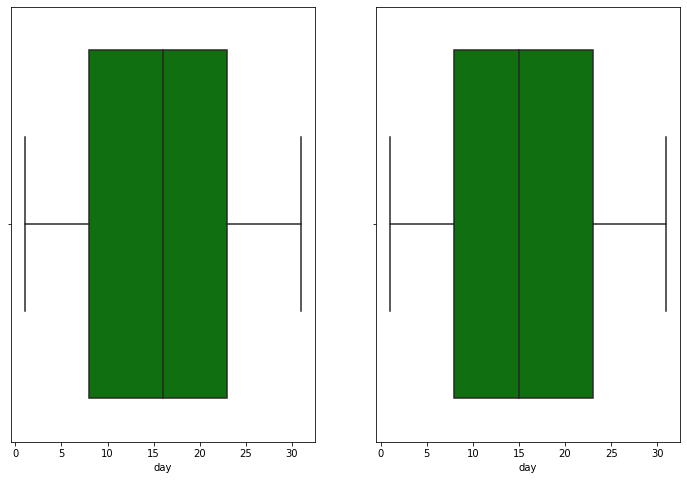

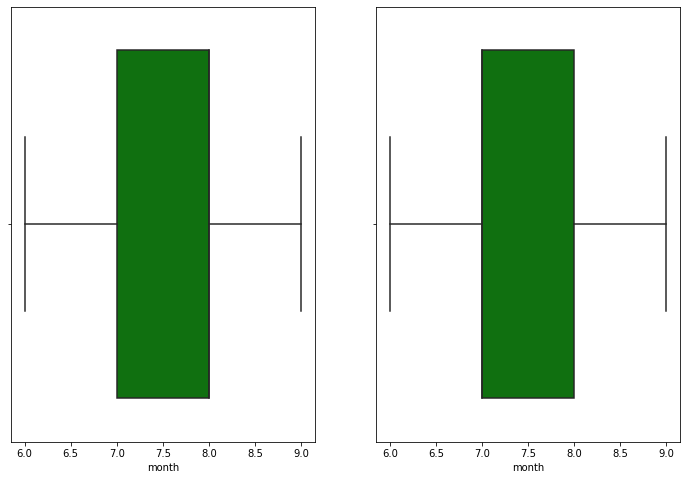

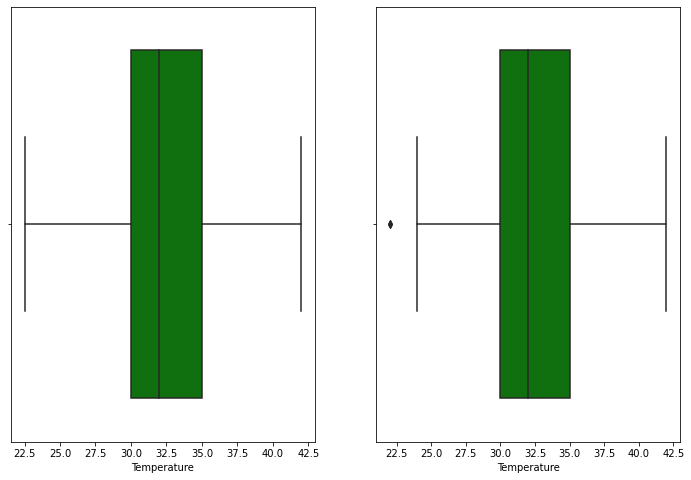

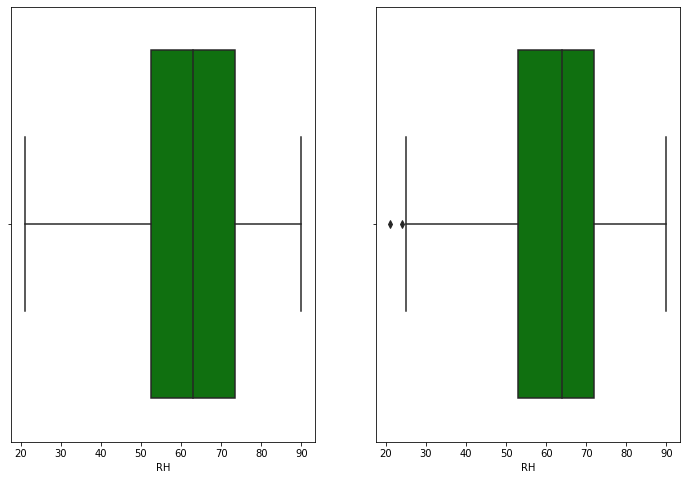

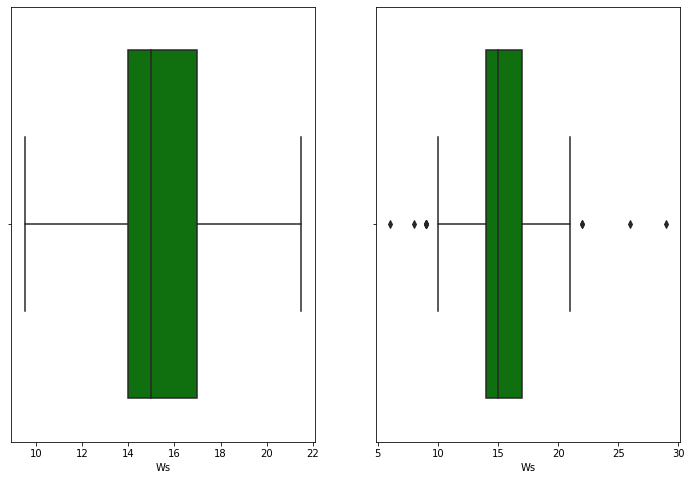

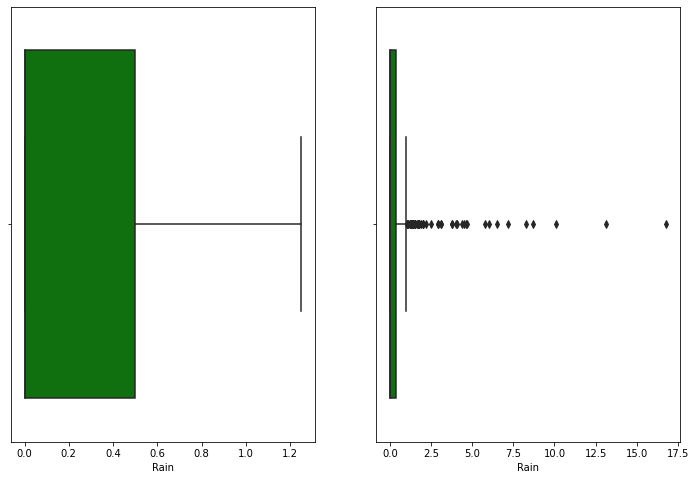

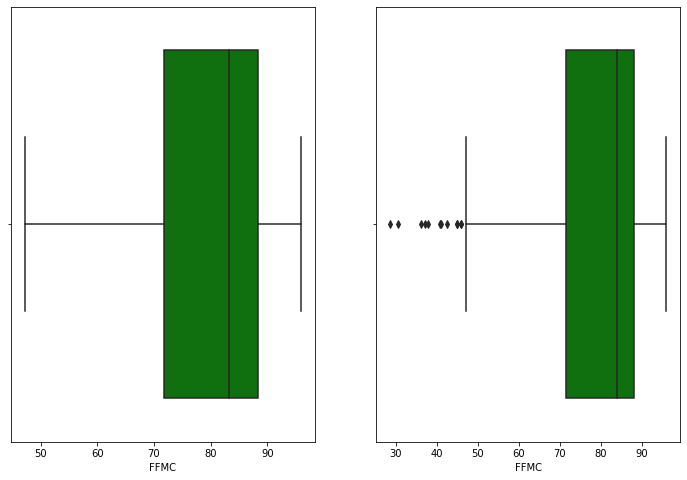

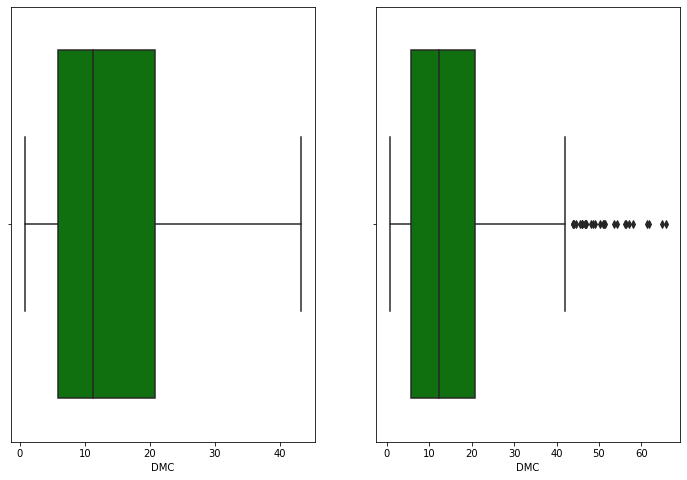

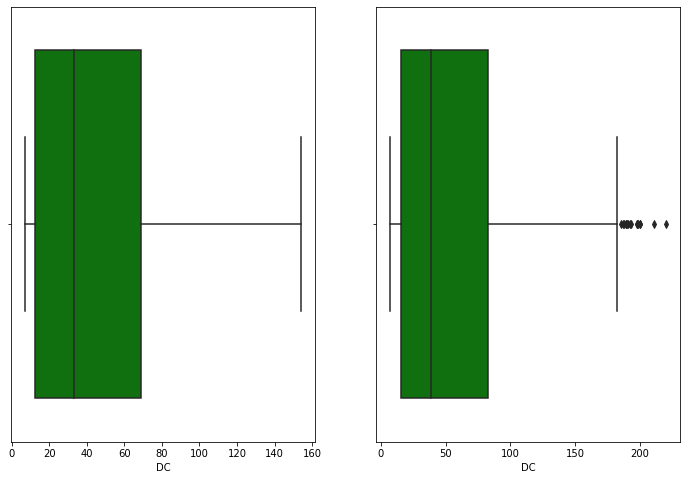

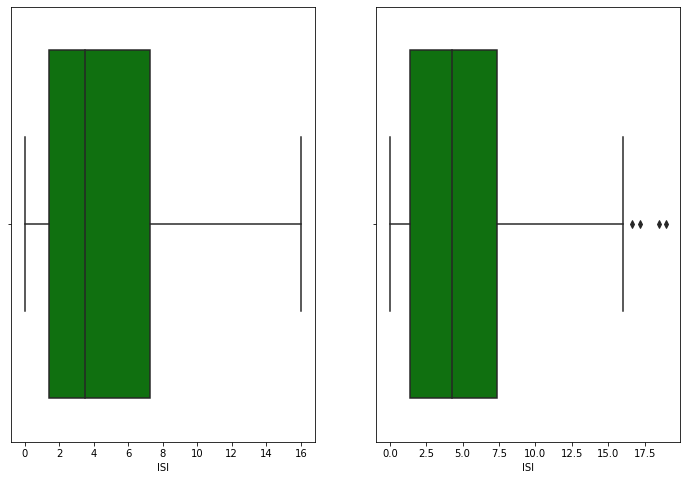

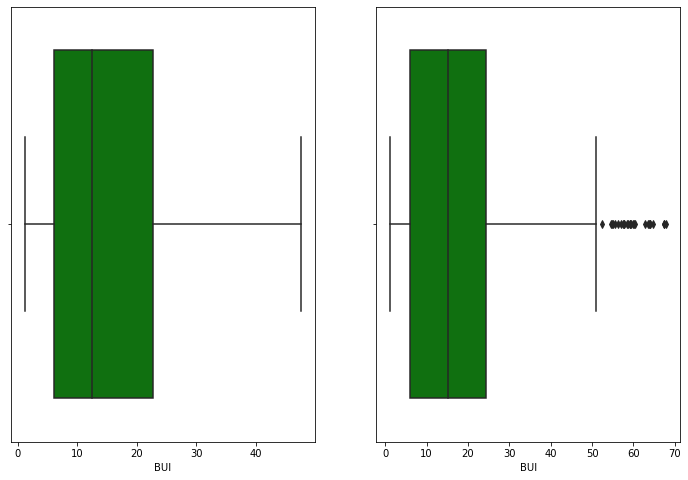

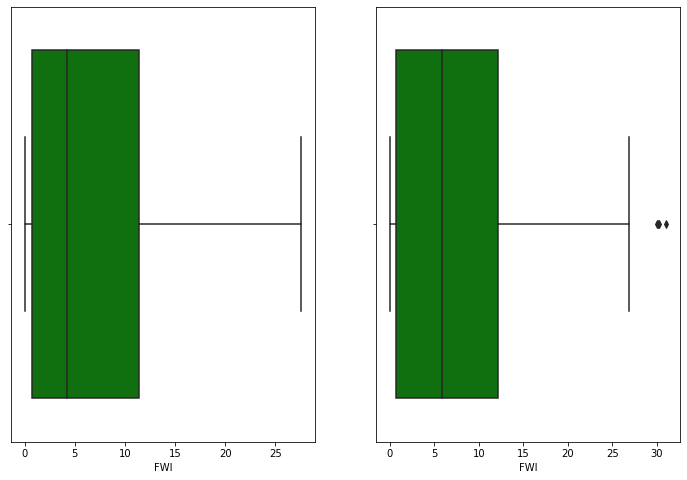

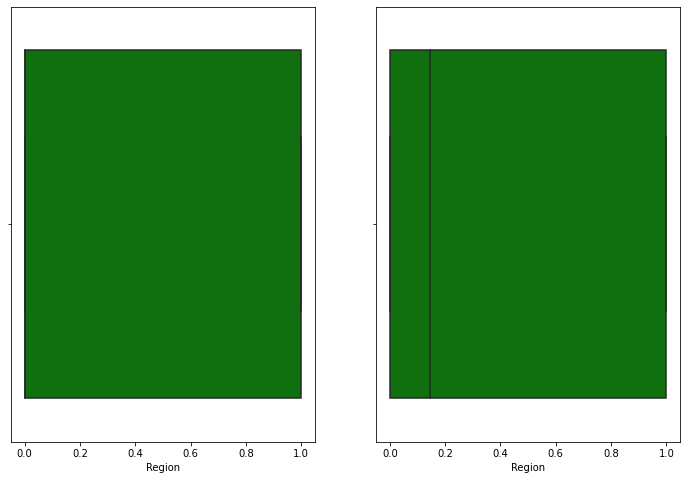

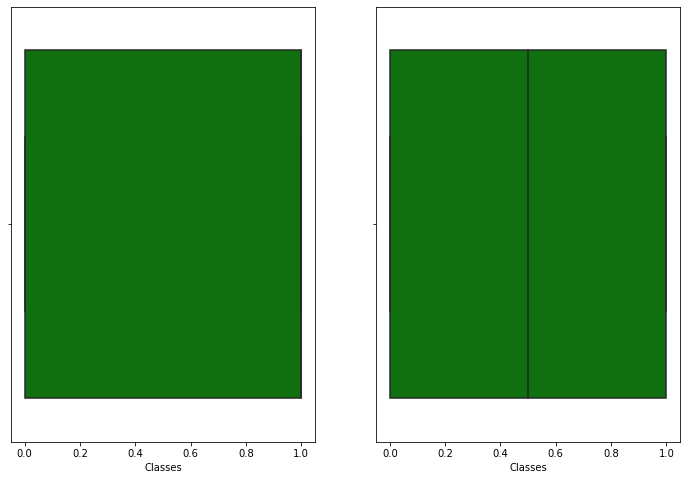

In [101]:
for i in num_data_bal:
    plt.figure(figsize = (12,8))
    plt.subplot(121)
    sns.boxplot(data = data,x = i,color ='g')
    
    plt.subplot(122)
    sns.boxplot(data =data_bal , x = i, color = 'g')

## <font color=green>Test Train Split</font>

In [102]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_bal,y_bal,test_size=0.30,random_state=16)

In [103]:
X_train1.head()

day  month  Temperature  RH  Ws      Rain       FFMC        DMC  \
343   18      8           35  49  17  0.000000  90.073890  20.866431   
136   14      8           33  66  14  0.000000  87.000000  21.700000   
7      3      6           29  80  14  2.000000  48.700000   2.200000   
250    4      8           34  64  13  0.028193  85.606145   9.271326   
265    8      6           31  67  14  1.354542  66.570777   7.560379   

             DC        ISI        BUI        FWI    Region  
343  107.626818  10.686768  27.957283  17.423713  0.240675  
136   94.700000   5.700000  27.200000  10.600000  0.000000  
7      7.600000   0.300000   2.600000   0.100000  1.000000  
250   21.999038   4.592049   9.271326   4.858555  0.140964  
265    9.148048   1.106494   7.270120   0.596753  0.000000

In [104]:
X_test1.head()

day  month  Temperature  RH  Ws     Rain       FFMC        DMC  \
64    20      9           34  58  13  0.20000  79.500000  18.700000   
54    17      7           29  70  14  0.00000  82.800000   9.400000   
26    12      8           39  21  17  0.40000  93.000000  18.400000   
103   22      9           31  50  19  0.60000  77.800000  10.600000   
279    8      7           33  67  18  0.00038  85.607028  12.506268   

            DC        ISI       BUI        FWI    Region  
64   88.000000   2.100000  24.40000   3.800000  1.000000  
54   34.100000   3.200000  11.10000   3.600000  0.000000  
26   41.500000  15.500000  18.40000  18.800000  1.000000  
103  41.400000   2.400000  12.90000   2.800000  0.000000  
279  49.772649   6.004179  15.40076   8.005128  0.001899

In [105]:
y_train1.head()

343    0
136    1
7      1
250    0
265    0
Name: Classes, dtype: int64

In [106]:
y_test1.head()

64     1
54     1
26     1
103    1
279    0
Name: Classes, dtype: int64

## <font color=green>Logistic Regression Model</font>

In [107]:
from sklearn.linear_model import LogisticRegression
classifier_bal=LogisticRegression()
classifier_bal

LogisticRegression()

In [108]:
from sklearn.model_selection import GridSearchCV
parameter_bal={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [109]:
classifier_regressor_bal=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

## <font color=green>Standarizing or Feature Scaling</font>

In [110]:
classifier_regressor_bal.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [111]:
print(classifier_regressor_bal.best_params_)

{'C': 50, 'max_iter': 100, 'penalty': 'l2'}


In [112]:
print(classifier_regressor_bal.best_score_)

0.7016949152542372


## <font color=green>Prediction</font>

In [113]:
y_bal_pred = classifier_regressor_bal.predict(X_test1)
y_bal_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

## <font color=green>Accuracy</font>

In [114]:
from sklearn.metrics import accuracy_score,classification_report
bal_score = accuracy_score(y_bal_pred,y_test1)
print(bal_score)

0.7007874015748031


## <font color=green>Classification Report</font>

In [115]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74        81
           1       0.56      0.78      0.65        46

    accuracy                           0.70       127
   macro avg       0.70      0.72      0.70       127
weighted avg       0.74      0.70      0.71       127



## Performance Metrics

## <font color=green>Confusion Metrics</font>

In [116]:
conf_mat_bal=confusion_matrix(y_bal_pred,y_test1)
conf_mat_bal

array([[53, 28],
       [10, 36]])

In [117]:
true_positive = conf_mat_bal[0][0]
false_positive = conf_mat_bal[0][1]
false_negative = conf_mat_bal[1][0]
true_negative = conf_mat_bal[1][1]
print('true_positive:',true_positive)
print('false_positive:',false_positive)
print('true_negative:',true_negative)
print('false_negative:',false_negative)

true_positive: 53
false_positive: 28
true_negative: 36
false_negative: 10


## <font color=green>Precision</font>

In [118]:
bal_Precision = true_positive/(true_positive+false_positive)
bal_Precision

0.654320987654321

## <font color=green>Recall</font>

In [119]:
bal_recall = true_positive/(true_positive+false_negative)
bal_recall

0.8412698412698413

## <font color=green>F1-Score</font>

In [120]:
F1_Score_bal = 2*(bal_recall * bal_Precision) / (bal_recall + bal_Precision)
F1_Score_bal

0.7361111111111113

# <font color=green>Conclusion</font>

## <font color=green>Performance of Logistic Model on Original Dataset</font>

In [121]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        24
         1.0       0.97      0.97      0.97        37

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



## <font color=green>Performance of logistic model on balanced dataset which are created from imbalanced dataset</font>

In [122]:
print(classification_report(y_bal_pred,y_test1))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74        81
           1       0.56      0.78      0.65        46

    accuracy                           0.70       127
   macro avg       0.70      0.72      0.70       127
weighted avg       0.74      0.70      0.71       127



In [123]:
auc = roc_auc_score(y_pred, y_test)
print("Area under curve of original dataset",auc)

Area under curve of original dataset 0.9656531531531533


In [124]:
auc1 = roc_auc_score(y_bal_pred, y_test1)
print("Area under curve of balaced dataset",auc1)

Area under curve of balaced dataset 0.7184648416532475


## Observation
- It seems that model is good when we predict from original dataset
- It seems that model is very bad when we try to predict from balanced(created from an imbalanced dataset )
- Also the area under curve (AUC) of original dataset is more, so that model is good